In [1]:
cd ../../../Downloads/xBenedetta/

/home/benny/Downloads/xBenedetta


In [2]:
import numpy as np
from scipy.signal import find_peaks
import matplotlib.pyplot as plt

In [3]:
def my_moving_window(x, window=3, FUN=np.mean):
    """
    Calculates a moving estimate for a signal

    Args:
      x (numpy.ndarray): a vector array of size N
      window (int): size of the window, must be a positive integer
      FUN (function): the function to apply to the samples in the window
    Returns:
      (numpy.ndarray): a vector array of size N, containing the moving
      average of x, calculated with a window of size window
    """
    if len(x.shape) == 2:
        output = np.zeros(x.shape)
        for rown in range(x.shape[0]):
            output[rown, :] = my_moving_window(x[rown, :],window=window,FUN=FUN)                       
        return output
    output = np.zeros(x.size)
    for samp_i in range(x.size):
        values = []
        # loop through the window:
        for wind_i in range(int(1 - window), 1):
            if ((samp_i + wind_i) < 0) or (samp_i + wind_i) > (x.size - 1):
                # out of range
                continue
            # sample is in range and not nan, use it:
            if not(np.isnan(x[samp_i + wind_i])):
                values += [x[samp_i + wind_i]]
        # calculate the mean in the window for this point in the output:
        output[samp_i] = FUN(values)
    return output


In [4]:
def findmaxima(_input):
    maxima=[]
    for i in range(1, len(_input)-1):
        if (_input[i-1] < _input[i] and _input[i] > _input[i+1]): 
                maxima.append([i, _input[i]])
    maxima = np.array(maxima)
    return(maxima)

# Dataset 1 

In [6]:
import mat73
#mat = mat73.loadmat("StimPiezo_002_210211_114350.mat");

#mat = mat73.loadmat("StimPiezo_001_210121_102250.mat")
mat = mat73.loadmat("StimPiezo_002_210209_120836.mat")
#103822

/home/benny/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [7]:
mat['sampling_frequency']

array(25000.)

In [7]:
#import mat73
#mat = mat73.loadmat("StimPiezo_210119_123701.mat");

In [8]:
matr = mat['amplifier_data']

In [9]:
stim = mat['adc_data']
stim2 = mat['dig_in_data']

In [9]:
1/25000

4e-05

In [10]:
from scipy import signal
import numpy as np
t = np.arange(0,len(matr[0]))*0.00004
dt = t[1]-t[0]
fs = 1/dt
nyq = 0.5*fs
lowcut =  3 - 1 # verificare questa frequenza dominante
highcut = 3 + 1
low = lowcut / nyq
high = highcut / nyq
order = 2
f, h = signal.butter(order,[low, high], btype='bandpass')

lowcut = 0.1
highcut = 150
low = lowcut / nyq
high = highcut / nyq
order = 2
f2, h2 = signal.butter(order,[low, high], btype='bandpass')
#newdata = np.empty((27,len(matr[0])))
lfp = np.empty((27,len(matr[0])))

for s in range(27):
    sig = matr[s,:]
    lfp[s,:] = signal.filtfilt(f2, h2, sig, padlen=150)    
    #newdata[s,:] = signal.filtfilt(f, h, sig, padlen=150)

In [11]:
indexes = (np.where(stim> 1.5)[0])[np.where(np.diff(np.where(stim> 1.5)[0])>1)]
indexes

array([ 241474,  491472,  741470,  991468, 1241467, 1491465, 1741463,
       1991461, 2241459, 2491457, 2741455, 2991453, 3241452, 3491450,
       3741448, 3991446, 4241444, 4491442, 4741440, 4991438, 5241437,
       5491435, 5741433, 5991431, 6241429, 6491427, 6741425, 6991423,
       7241421])

In [73]:
del sig

In [22]:
len(indexes)

29

In [12]:
num = len(indexes)
lfpTrials = np.zeros((num, 25000*9, 27))
for l in range(len(indexes)):
    lfpTrials[l] = lfp[:,indexes[l]:indexes[l]+25000*9].T

In [17]:
len(lfp[8,7081420:])/(25000)

16.75472

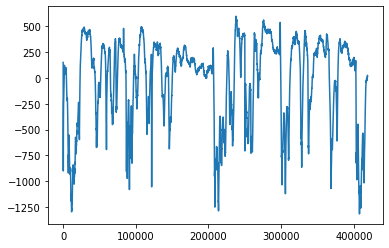

In [14]:
plt.plot()

In [20]:
lfpTrials.shape

(29, 225000, 27)

3.0

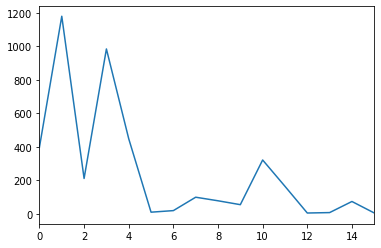

In [32]:
#plt.plot(lfpTrials[28,:25000,11])

x,p = signal.welch(lfpTrials[1,:25000,18], fs = 25000, nperseg = 25000)
plt.plot(x,p)
plt.xlim(0,15)
        #print(el,tr)
a1 = x[np.array(findmaxima(p)[:,0], dtype = int)][np.argsort(findmaxima(p)[:,1])[::-1]]
        #a2 =  x[np.array(findmaxima(p)[:,0], dtype = int)[np.argsort(findmaxima(p)[:,1])[::-1]]]
a1[1]

In [48]:
from scipy import stats
stats.mode(freq)

ModeResult(mode=array([6.]), count=array([160]))

In [61]:
freq = []
secondpower = []
thirdfreq = []
thirdpower = []
for el in range(27):
    for tr in range(29):
        x,p = signal.welch(lfpTrials[tr,:25000,el], fs = 25000, nperseg = 25000)
        #print(el,tr)
        idx = np.array(findmaxima(p)[:,0], dtype = int)[np.argsort(findmaxima(p)[:,1])[::-1]]
        a1 = x[idx]
        pp = p[idx]                                          
        #a2 =  x[np.array(findmaxima(p)[:,0], dtype = int)[np.argsort(findmaxima(p)[:,1])[::-1]]]
        freq.append(a1[1])
        secondpower.append(p[1])
        thirdfreq.append(a1[2])
        secondpower.append(pp[1])
        thirdpower.append(pp[2])
                                                    

In [65]:
np.mean(thirdpower), np.mean(secondpower)

(674.2907914173614, 17672.383112070467)

<AxesSubplot:ylabel='Density'>

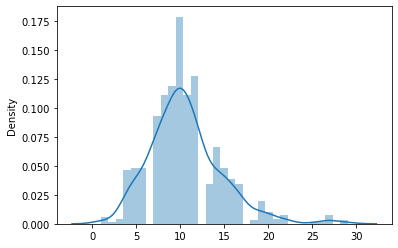

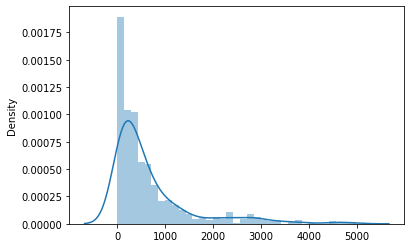

In [62]:
import seaborn as sn
sn.distplot(thirdfreq)
# analizzare anche terze frequenze
import warnings
warnings.filterwarnings(action ='ignore' )

plt.figure()
sn.distplot(thirdpower)


In [66]:
freq = []
secondpower = []
thirdfreq = []
thirdpower = []
for el in range(27):
    for tr in range(29):
        x,p = signal.welch(lfpTrials[tr,25000*3:,el], fs = 25000, nperseg = 25000)
        #print(el,tr)
        idx = np.array(findmaxima(p)[:,0], dtype = int)[np.argsort(findmaxima(p)[:,1])[::-1]]
        a1 = x[idx]
        pp = p[idx]                                          
        #a2 =  x[np.array(findmaxima(p)[:,0], dtype = int)[np.argsort(findmaxima(p)[:,1])[::-1]]]
        freq.append(a1[1])
        secondpower.append(p[1])
        thirdfreq.append(a1[2])
        secondpower.append(pp[1])
        thirdpower.append(pp[2])

In [67]:
np.mean(thirdpower), np.mean(secondpower)

(201.1835697745347, 14788.388253246289)

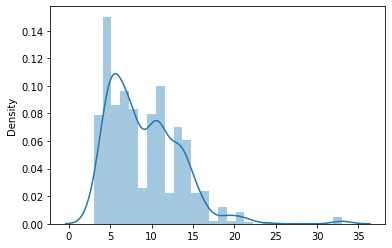

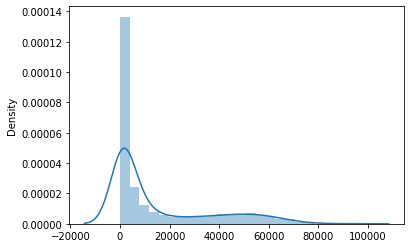

In [68]:
import seaborn as sn
sn.distplot(freq)
# analizzare anche terze frequenze
import warnings
warnings.filterwarnings(action ='ignore' )

plt.figure()
sn.distplot(secondpower);

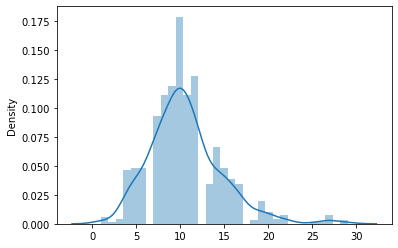

In [45]:
import seaborn as sn
sn.distplot(thirdfreq)
# analizzare anche terze frequenze
import warnings
warnings.filterwarnings(action ='ignore' )

/home/benny/anaconda3/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


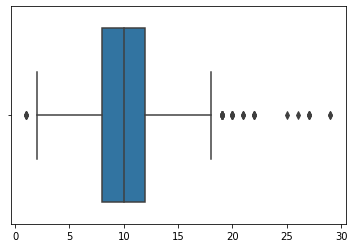

In [37]:
import seaborn as sn
sn.boxplot(thirdfreq);

## analyze also third frequencies

(0.0, 30.0)

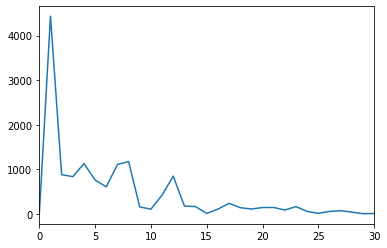

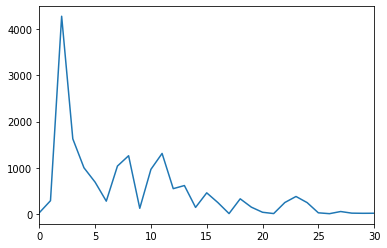

In [78]:


plt.figure()
x,p = signal.welch(lfpTrials[18,:25000,20], fs = 25000, nperseg = 25000)
plt.plot(x,p)
plt.xlim(0,30)




plt.figure()
x,p = signal.welch(lfpTrials[10,:25000,20], fs = 25000, nperseg = 25000)
plt.plot(x,p)
plt.xlim(0,30)

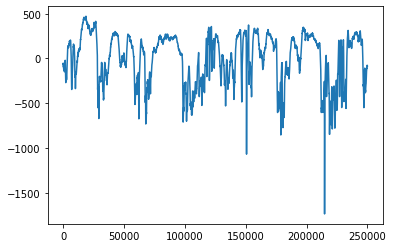

In [13]:
plt.plot(lfp[18,:25000*10])

In [32]:
def Thres(coef,x):
    """
    Calculates Quiroga detection threshold
    """
    return coef*np.median(np.abs(x)/0.6745) 

def findpeaks(sig, thres, choose):
    """
    Finds peaks in a time series.
    Set eventual other constraints in the scipy.signal function find_peaks
    """
    sig2 = np.zeros(sig.shape, dtype = int)
    if choose == "neg":
        p1 = find_peaks(-(sig - np.mean(sig)), height = thres, distance = 10)[0]
        if np.any(p1):
            sig2[p1] = 1
            
    if choose == "posneg":
        p1 = find_peaks(-(sig - np.mean(sig)), height = thres)[0]
        p2 = find_peaks((sig - np.mean(sig)), height = thres)[0]
        if np.any(p1.tolist() + p2.tolist()):
            sig2[np.array(p1.tolist()+ p2.tolist())] = 1
    return sig2

def firingrate(array, timebin=250):
    # array shape: trials x time x channels
    
    time = array.shape[1]
    rest = int(timebin)*int(time/timebin + 1) - int(time) 

    firingrates = np.zeros((array.shape[0],int((time + rest)/timebin), timebin))
    array = np.sum(array,2)

    for l in range(len(array)):
        firingrates[l] =np.append(array[l,:], np.zeros(rest)).reshape(int((time+rest)/timebin), timebin)

    firingrates = np.sum(firingrates, axis = 2)
    return firingrates

In [33]:
def RasterPlot(spikes,ax):
    #print(spikes.shape)
    idx = spikes > 0
    #print(idx)
    #print(idx.shape)
    times = np.arange(0,len(spikes),1)
    #print(times.shape)
    for l in range(spikes.shape[1]):
        x = times[idx[:,l]]
        ax.scatter(x, [l for i in range(len(x))], marker ='s', c = 'black',s = 1.)

In [11]:
import matplotlib.pyplot as plt

In [27]:
from scipy import signal
import numpy as np
t = np.arange(0,len(matr[0]))*0.00004
dt = t[1]-t[0]
fs = 1/dt
nyq = 0.5*fs

lowcut = 300
highcut = 3000
low = lowcut / nyq
high = highcut / nyq
order = 2
f, h = signal.butter(order,high, btype='lowpass')
f2, h2 = signal.butter(order,low, btype='highpass')

spikes = np.empty((27,len(matr[0])))
#lfp = np.empty((27,len(matr[0])))

for s in range(27):
    sig = matr[s,:]
    #lfp[s,:] = signal.filtfilt(f2, h2, sig, padlen=150)    
    sig2 = signal.filtfilt(f, h, sig, padlen=150)
    spikes[s,:] = signal.filtfilt(f2, h2, sig2, padlen=150)    

array([ 214658,  464656,  714654,  964652, 1214650, 1464648, 1714647,
       1964645, 2214643, 2464641, 2714639, 2964638, 3214636, 3464634,
       3714632, 3964630, 4214629, 4464627, 4714625, 4964623, 5214621,
       5464619, 5714618, 5964616, 6214614, 6464612, 6714610, 6964609,
       7214607])

In [55]:
214658 - 214534

124

In [54]:
np.where(stim> 1.5)[0]

array([ 214534,  214535,  214536, ..., 7464603, 7464604, 7464605])

In [45]:
np.where(stim> 1.5)[0][:10000]

array([ 214534,  214535,  214536, ..., 7464603, 7464604, 7464605])

In [42]:
np.where(np.diff(np.where(stim> 1.5)[0])>1)

(array([ 124,  249,  374,  499,  623,  747,  872,  997, 1122, 1246, 1370,
        1495, 1620, 1745, 1870, 1994, 2119, 2244, 2369, 2494, 2618, 2742,
        2867, 2992, 3117, 3242, 3366, 3491, 3616]),)

In [15]:
indexes = np.array(indexes.tolist() + [int(indexes[-1] + np.diff(indexes)[-1])]) - 125

In [38]:
(len(spikes[0]) -  indexes[-1])/25000

1.42732

In [71]:
124/25

4.96

(214000.0, 215000.0)

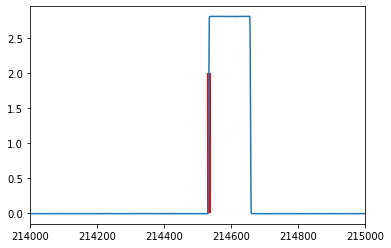

In [70]:
plt.vlines(indexes,0,2, 'r', lw = 4)
plt.plot(stim)
plt.xlim(214000,215000)

In [28]:
## num = len(indexes)
spikesTrials = np.zeros((num, 25000, 27))
for l in range(len(indexes)):
    spikesTrials[l] = spikes[:,indexes[l]:indexes[l]+25000].T

In [19]:
num = len(indexes)
lfpTrials = np.zeros((num, 25000*9, 27))
for l in range(len(indexes)-1):
    lfpTrials[l] = lfp[:,indexes[l]:indexes[l]+25000*9].T

NameError: name 'indexes' is not defined

In [34]:
binspikes =  np.zeros((num,int(25000),27))
for i in range(num):
    #array3Stim[g,i] = newdata[:,int(lis[i]):int(lis[i])+int(25000*2)].transpose()
    #array3StimSpikes[g,i] = newdataspikes[:,int(lis[i]):int(lis[i])+int(25000*2)].transpose()
    for ch in range(27):
        binspikes[i,:,ch] = findpeaks(spikesTrials[i,:,ch], Thres(3.5,spikesTrials[i,:,ch]),"neg")

(0.2, 0.5)

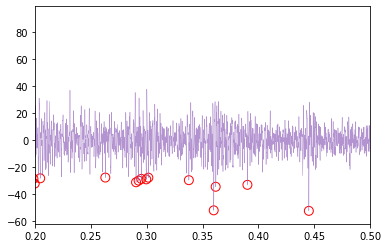

In [35]:
conv = 0.00004
maxtime= 25000
electr = 15
ntrial = 13
time = np.arange(0,maxtime,1)
plt.plot(time*conv,spikesTrials[ntrial,:maxtime,electr], color = "tab:purple",alpha = 0.7,lw =0.5)
plt.scatter((time*conv)[binspikes[ntrial,:maxtime,electr]>0], spikesTrials[ntrial,:maxtime,electr][binspikes[ntrial,:maxtime,electr]>0], s = 80,facecolors='none', edgecolors='r')
plt.xlim(0.2,0.5)

In [20]:
mean= lfpTrials.mean(0)

In [36]:
x,Pxx =signal.periodogram(mean[int(25000):int(25000*3),18], fs = 1/0.00004)
plt.plot(x,Pxx)
plt.xlim(0,20)

NameError: name 'mean' is not defined

In [77]:
pxx =[]
for l in range(30):
    for s in range(27):
        x,Pxx =signal.periodogram(lfpTrials[l,:int(25000*0.5),s], fs = 1/0.00004)
        pxx.append(Pxx)

In [98]:
pxx =[]
for l in range(29):
    for s in range(27):
        x,Pxx =signal.periodogram(lfpTrials[l,int(25000):int(25000*6),s], fs = 1/0.00004)
        pxx.append(Pxx)

(0.0, 20.0)

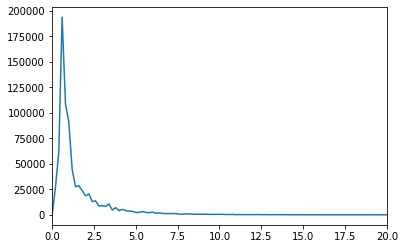

In [99]:
#x,Pxx =signal.periodogram(mean[:int(25000*0.5),18], fs = 1/0.00004)
pxx = np.array(pxx)
plt.plot(x,np.mean(pxx,0))
plt.xlim(0,20)

In [103]:
findmaxima(np.mean(pxx,0))[:,0]
findmaxima(np.mean(pxx,0))[:,1]


array([1.93653648e+05, 2.85778575e+04, 2.05836558e+04, ...,
       1.31358125e-03, 1.27105706e-03, 1.24961821e-03])

(0.0, 20.0)

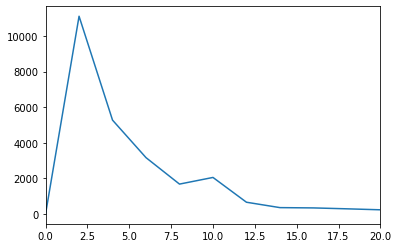

In [40]:
#x,Pxx =signal.periodogram(mean[:int(25000*0.5),18], fs = 1/0.00004)
pxx = np.array(pxx)
plt.plot(x,np.mean(pxx,0))
plt.xlim(0,20)

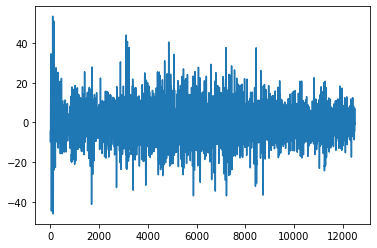

In [17]:
##### lfpTrials.shape
plt.plot(spikesTrials[10,:int(25000*0.5),15])

In [29]:
trial = binspikes[:10].sum(0)
trial = np.array(trial > 0, dtype = int)

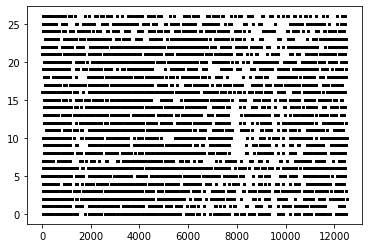

In [30]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
RasterPlot(trial[:int(25000*0.5)],ax)

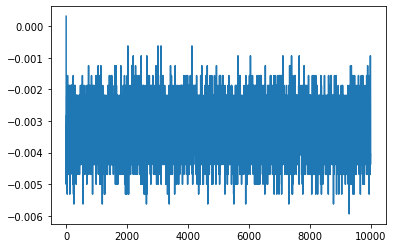

In [44]:
plt.plot(stim[:10000])

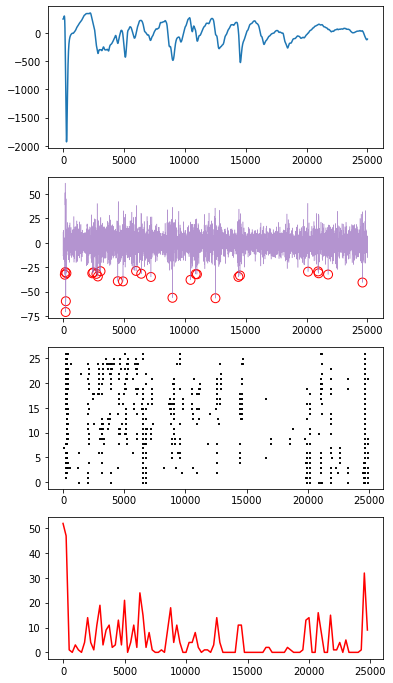

In [39]:
timebin = 250
electr = 18
#trial = 9 StimPiezo_001_210122_102100.m
trial =9
time =int(25000)

fir = firingrate(binspikes, timebin)

fig = plt.figure(figsize = (6,12))


ax = fig.add_subplot(4,1,1)
ax.plot(lfpTrials[trial,:int(time),electr])


conv = 0.00004
#maxtime= 25000

#ntrial = 10

ax = fig.add_subplot(4,1,2)

times = np.arange(0,time,1)
ax.plot(times,spikesTrials[trial,:time,electr], color = "tab:purple",alpha = 0.7,lw =0.5)
ax.scatter((times)[binspikes[trial,:time,electr]>0], spikesTrials[trial,:time,electr][binspikes[trial,:time,electr]>0], s = 80,facecolors='none', edgecolors='r')

ax = fig.add_subplot(4,1,3)
RasterPlot(binspikes[trial,:int(time)],ax)

ax = fig.add_subplot(4,1,4)
ax.plot(np.arange(0,int(time/timebin)*timebin,timebin), fir[trial,:int(time/timebin)], 'r');




In [26]:
30000/25

1200.0

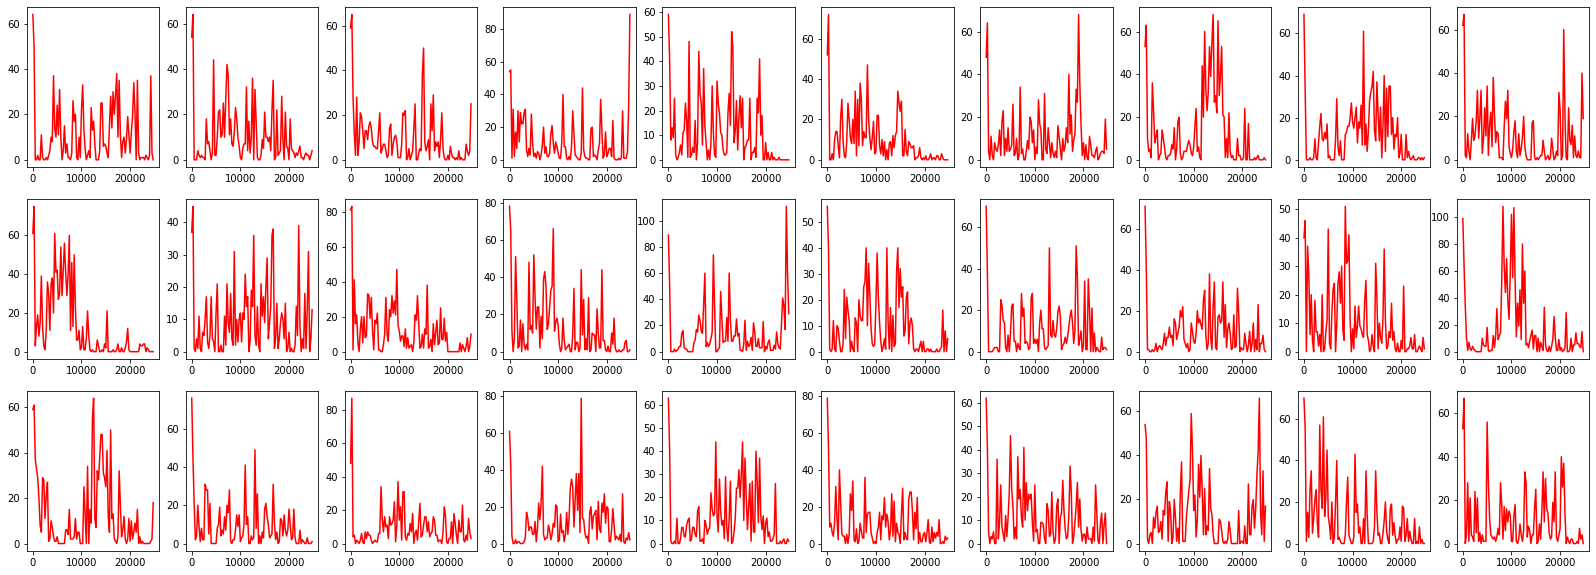

In [85]:
timebin = 250
#electr = 10
#trial = 9
fig, ax = plt.subplots(3,10, figsize = (28,10))
time =25000
num = lfpTrials.shape[0]
fir = firingrate(binspikes, timebin)

for l in range(10):


    conv = 0.00004
    #maxtime= 25000

    ax[0,l].plot(np.arange(0,int(time/timebin)*timebin,timebin), fir[l,:int(time/timebin)], 'r');
    ax[1,l].plot(np.arange(0,int(time/timebin)*timebin,timebin), fir[l+ 10,:int(time/timebin)], 'r');
    #if l <9:
    ax[2,l].plot(np.arange(0,int(time/timebin)*timebin,timebin), fir[l+ 20,:int(time/timebin)], 'r');
    


In [67]:
fir = firingratesingle(binspikes,250)

In [73]:
np.mean(fir,0).shape

(901, 27)

(0.0, 100.0)

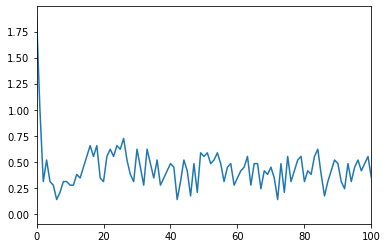

In [68]:
plt.plot(np.mean(fir,0)[:,22])
plt.xlim(0,int(25000/250))

In [33]:

def firingratesingle(array, timebin=250):
    # array shape: trials x time x channels
    
    time = array.shape[1]
    rest = int(timebin)*int(time/timebin + 1) - int(time) 

    firingrates = np.zeros((array.shape[0],int((time + rest)/timebin), timebin,27))
    #array = np.sum(array,2)

    for l in range(len(array)):
        for el in range(27):
            firingrates[l,:,:,el] =np.append(array[l,:,el], np.zeros(rest)).reshape(int((time+rest)/timebin), timebin)

    firingrates = np.sum(firingrates, axis = 2)
    return firingrates

In [41]:
binspikes.shape

(29, 225000, 27)

(27, 251, 100) 100 (27, 25000)
(27, 251, 100)
(27, 251)


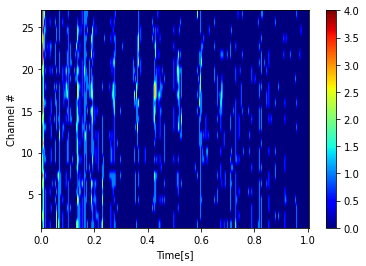

In [86]:
import matplotlib.cm as cm
maxtime = 25000*1
trialstim1 = binspikes[28].T[:,:maxtime]
timebin = 100
time = trialstim1.shape[1]
rest =  int(timebin)*int(time/timebin + 1) - int(time) 

rebinned = np.zeros((trialstim1.shape[0],int((time + rest)/timebin), timebin))
print(rebinned.shape,rest, trialstim1.shape)
for l in range(len(trialstim1)):
    rebinned[l] =np.append(trialstim1[l,:], np.zeros(rest)).reshape(int((time+rest)/timebin), timebin)
print(rebinned.shape)
rebinned = np.sum(rebinned, axis = 2)
print(rebinned.shape)


plt.figure()
    #t = np.arange(0,array.shape[1],1)
plt.imshow(rebinned,                                   # Image the data from condition A.
           cmap=cm.jet,                            # ... set the colormap (optional)
           extent=[0*timebin*conv, rebinned.shape[1]*timebin*conv, 1, rebinned.shape[0]],       # ... set axis limits (t[-1] represents the last element of t)
           aspect='auto',                          # ... set aspect ratio 
           origin='lower')                         # ... put origin in lower left corner
plt.xlabel('Time[s]')                              # Label the axes
plt.ylabel('Channel #')
plt.colorbar();  

(27, 163, 150) 75 (27, 24375)
(27, 163, 150)
(27, 163)


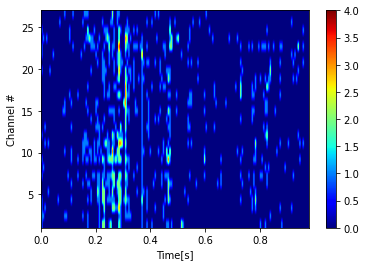

In [24]:
import matplotlib.cm as cm
maxtime = 25000
trial = 28
trialstim1 = binspikes[trial].T[:,625:maxtime]
timebin = 150
time = trialstim1.shape[1]
rest =  int(timebin)*int(time/timebin + 1) - int(time) 

rebinned = np.zeros((trialstim1.shape[0],int((time + rest)/timebin), timebin))
print(rebinned.shape,rest, trialstim1.shape)
for l in range(len(trialstim1)):
    rebinned[l] =np.append(trialstim1[l,:], np.zeros(rest)).reshape(int((time+rest)/timebin), timebin)
print(rebinned.shape)
rebinned = np.sum(rebinned, axis = 2)
print(rebinned.shape)


plt.figure()
    #t = np.arange(0,array.shape[1],1)
plt.imshow(rebinned,                                   # Image the data from condition A.
           cmap=cm.jet,                            # ... set the colormap (optional)
           extent=[0*timebin*conv, rebinned.shape[1]*timebin*conv, 1, rebinned.shape[0]],       # ... set axis limits (t[-1] represents the last element of t)
           aspect='auto',                          # ... set aspect ratio 
           origin='lower')                         # ... put origin in lower left corner
plt.xlabel('Time[s]')                              # Label the axes
plt.ylabel('Channel #')
plt.colorbar();  

In [126]:
rebinned.shape[1]

98

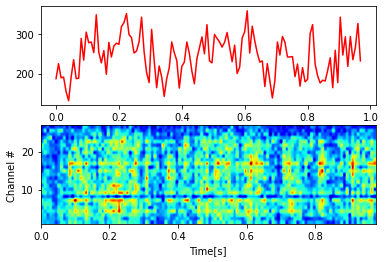

In [22]:
import matplotlib.cm as cm
maxtime = 25000
trialstim1 = np.sum(binspikes,0).T[:,625:maxtime]
timebin = 200
time = trialstim1.shape[1]
rest =  int(timebin)*int(time/timebin + 1) - int(time) 

rebinned = np.zeros((trialstim1.shape[0],int((time + rest)/timebin), timebin))
#(rebinned.shape,rest, trialstim1.shape)
for l in range(len(trialstim1)):
    rebinned[l] =np.append(trialstim1[l,:], np.zeros(rest)).reshape(int((time+rest)/timebin), timebin)
#print(rebinned.shape)
rebinned = np.sum(rebinned, axis = 2)
#print(rebinned.shape)
#ax.set_xlim(0,rebinned.shape[1]*timebin*conv)# ... put origin in lower left corner


fig = plt.figure()
ax = fig.add_subplot(2,1,1)
ax.plot(np.arange(0, rebinned.shape[1],1)*timebin*conv,np.sum(rebinned,0), 'r')
ax = fig.add_subplot(2,1,2)
    #t = np.arange(0,array.shape[1],1)
ax.imshow(rebinned,                                   # Image the data from condition A.
           cmap=cm.jet,                            # ... set the colormap (optional)
           extent=[0*timebin*conv, rebinned.shape[1]*timebin*conv, 1, rebinned.shape[0]],       # ... set axis limits (t[-1] represents the last element of t)
           aspect='auto',                          # ... set aspect ratio 
           origin='lower') 
ax.set_xlim(0,rebinned.shape[1]*timebin*conv)# ... put origin in lower left corner
ax.set_xlabel('Time[s]')                              # Label the axes
ax.set_ylabel('Channel #');
#plt.colorbar();  

                                   # Show voltage to color mapping
#plt.vlines(0.25, 1, 1000, 'k', lw=2)
            # Indicate stimulus onset with line
#plt.savefig('Figs/summedactivity' + '6-19' +'.pdf')
#plt.show()

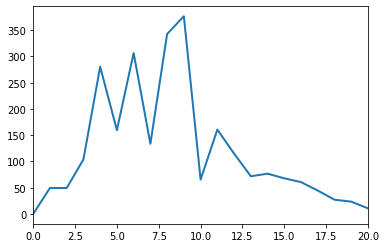

In [47]:
el = 11
sig = lfpTrials.mean(0)[:25000,el]
x, Pxx = signal.periodogram(sig, fs = 1/0.00004)
plt.plot(x,Pxx, lw = 2)
plt.xlim(0,20);

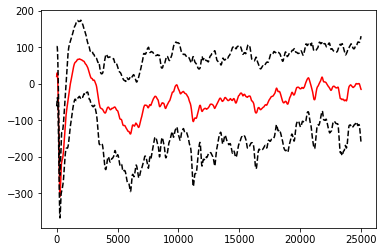

In [23]:
el = 22
plt.plot(lfpTrials.mean(0)[:25000,el],'r')
plt.plot(lfpTrials.mean(0)[:25000,el] + lfpTrials.std(0)[:25000,el] ,'k--')
plt.plot(lfpTrials.mean(0)[:25000,el] - lfpTrials.std(0)[:25000,el],'k--');

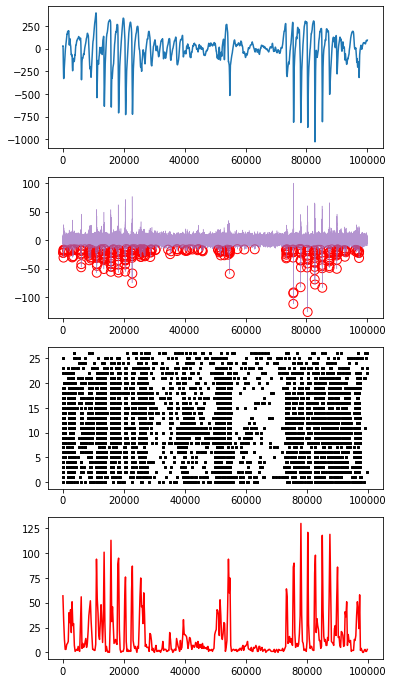

In [56]:
timebin = 250
electr = 15
trial = 28

time =25000*4

fir = firingrate(binspikes, timebin)

fig = plt.figure(figsize = (6,12))


ax = fig.add_subplot(4,1,1)
ax.plot(lfpTrials[trial,:int(time),electr])


conv = 0.00004
#maxtime= 25000

#ntrial = 10

ax = fig.add_subplot(4,1,2)

times = np.arange(0,time,1)
ax.plot(times,spikesTrials[trial,:time,electr], color = "tab:purple",alpha = 0.7,lw =0.5)
ax.scatter((times)[binspikes[trial,:time,electr]>0], spikesTrials[trial,:time,electr][binspikes[trial,:time,electr]>0], s = 80,facecolors='none', edgecolors='r')

ax = fig.add_subplot(4,1,3)
RasterPlot(binspikes[trial,:int(time)],ax)

ax = fig.add_subplot(4,1,4)
ax.plot(np.arange(0,time,timebin), fir[trial,:int(time/timebin)], 'r');




In [117]:
len(np.arange(0,time,timebin)),len(fir[0])

(2000, 4501)

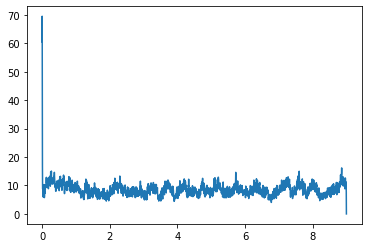

In [140]:
plt.plot(np.arange(0,len(spikesTrials[0]) + 1,timebin)*conv,np.mean(fir[:],0))
#plt.xlim(0.,4)

(0.0, 500000.0)

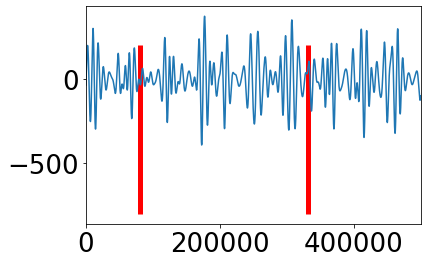

In [93]:
plt.vlines(indexes,-800,200, 'r', lw =5)
plt.plot(newdata[13,:25000*20])
plt.xlim(0,25000*20)

In [74]:
x,Pxx = signal.periodogram(newdata[18,indexes[0]:indexes[0]+ int(25000*0.5)],fs = 1/0.00004)

(0.0, 7.5)

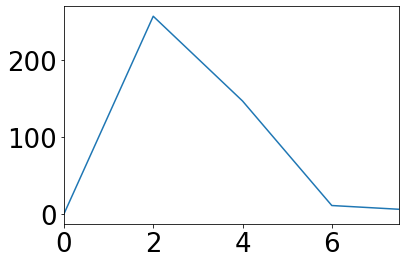

In [75]:
plt.plot(x,Pxx)
plt.xlim(0,7.5)

In [20]:
indexes = (np.where(stim> 1.5)[0])[np.where(np.diff(np.where(stim> 1.5)[0])>1)]
indexes

array([ 214658,  464656,  714654,  964652, 1214650, 1464648, 1714647,
       1964645, 2214643, 2464641, 2714639, 2964638, 3214636, 3464634,
       3714632, 3964630, 4214629, 4464627, 4714625, 4964623, 5214621,
       5464619, 5714618, 5964616, 6214614, 6464612, 6714610, 6964609,
       7214607])

In [15]:
def R_helper_detector_LFP(_input):
    maxima=[]
    for i in range(1, len(_input)-1):
        if (_input[i-1] < _input[i] and _input[i] > _input[i+1]) and _input[i] > np.median(_input) : 
                maxima.append([i, _input[i]])
    maxima = np.array(maxima)
    return(maxima)

In [94]:
trials = []
for r in range(len(indexes)):
    for el in range(27):
        trials.append(newdata[el,indexes[r]-25000:indexes[r]+25000*2])

In [95]:
trials = np.array(trials)

In [55]:
trials.shape


(783, 75000)

## Phase response curve

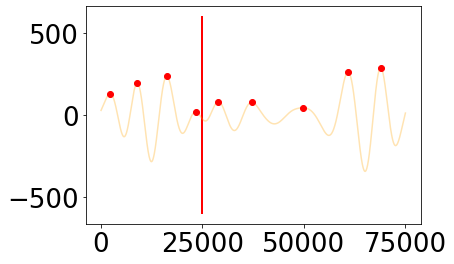

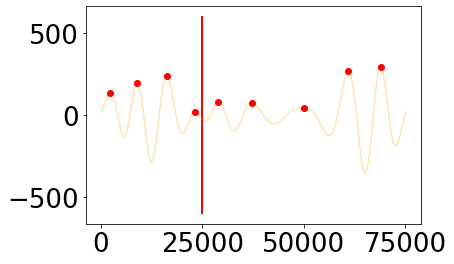

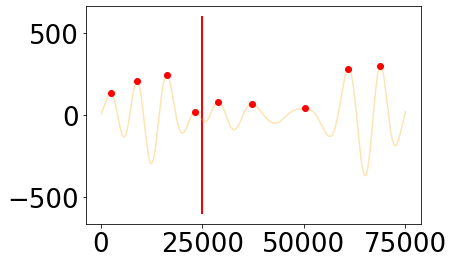

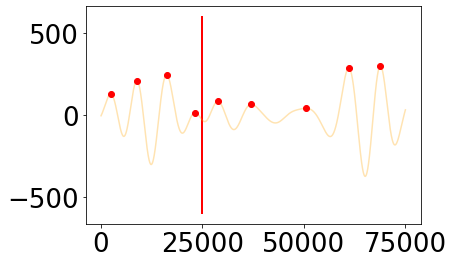

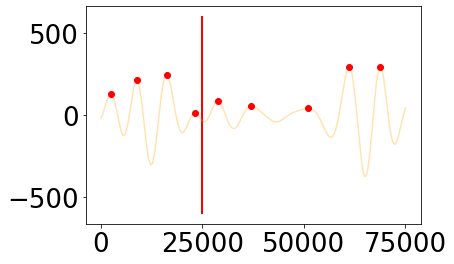

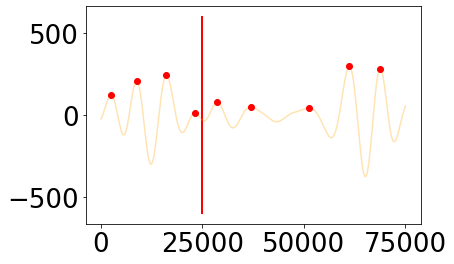

In [78]:
phasestim = []
phases = []
t_s = 25000
#t_s = 3051
o = 0

for trial in range(trials.shape[0]):
    #for elec in range(27):
    
    peaks =R_helper_detector_LFP(trials[trial,:])
    #print(peaks.shape)

    if trial < 6:
        plt.figure()
        plt.plot(trials[trial], 'orange', alpha = 0.3)

        plt.plot(peaks[:,0],peaks[:,1], 'ro')
        plt.vlines(t_s,-600,600, 'r', lw = 2)
        #plt.xlim(1000,1500)


    idx = np.where( (t_s- peaks[:,0]) == (t_s- peaks[:,0])[(t_s- peaks[:,0])>0].min())[0][0]
    time = peaks[:,0][idx]
    ts = t_s - time
    #t_s = 1110
    T0 =[]
    for r in range(len(peaks[:idx])):
        #print(len(peaks[:idx-1]))
        T0.append(peaks[:,0][idx-r] - peaks[:,0][idx -1-r])

    T0 = np.array(T0).mean()
    T1 = peaks[:,0][idx + 1] - peaks[:,0][idx]
    phase = (T0 - T1)/T0*2*np.pi
    phase_stim = ts/T0*2*np.pi
    if phase_stim > 2*np.pi: o+= 1
    f1 = np.sign(phase_stim)*(np.abs(phase_stim))%(2*np.pi)
    #print(phase_stim)
    #print(np.angle(np.exp(1j*phase_stim)) + np.pi, np.sign(phase_stim)*(np.abs(phase_stim))%(2*np.pi))
    phasestim.append(f1)
    #f2 = np.sign(phase)*(np.abs(phase))
    phases.append(np.angle(np.exp(1j*phase)))
    """
    if f2 > np.pi:
        phases.append(f2 - 2*np.pi)
    elif f2 < -np.pi:
        phases.append(f2 + 2*np.pi)
    else:
        phases.append(f2)
    """

In [105]:
plt.rcParams["axes.labelsize"] = 20
plt.rcParams["xtick.labelsize"] = 20
plt.rcParams["ytick.labelsize"] = 20

In [97]:
phases = np.array(phases)
phasestim = np.array(phasestim)
phases = phases[np.argsort(phasestim)]
phasestim = np.sort(phasestim)

for g in range(len(phasestim)):
    phasestim[g] = round(phasestim[g],3)
uni = np.unique(phasestim)
uniphases = [[] for r in range(len(uni))]
for l in range(len(uni)):
    for r in range(len(phases)):
        if phasestim[r] == uni[l]:
            uniphases[l].append(phases[r])

In [98]:
means = []
stds =[]
for r in range(len(uniphases)):
    means.append(np.mean(uniphases[r]))
    stds.append(np.std(uniphases[r])/np.sqrt(len(uniphases[r])))    

In [99]:
means,stds = np.array(means), np.array(stds)
#uniphases = np.array(uniphases)

In [100]:
mean = my_moving_window(means,10)
std = my_moving_window(stds,10)
unii = my_moving_window(uni,10)

## Fit of Fourier Coefficients

In [101]:
y = np.array(means)
oss01 = np.ones((len(uni)))
oss1 = np.cos(uni)
oss2 = np.cos(2*uni)
#oss02 = np.ones((len(unii)))
oss3 = np.sin(uni)
oss4 = np.sin(2*uni)

X = np.vstack((oss1,oss2,oss3,oss4,oss01)).T
a1,a2,b1,b2,a0= (np.linalg.inv(X.T @ X) @ X.T) @ y

$\beta = (X^T X)^{-1} X^T y$

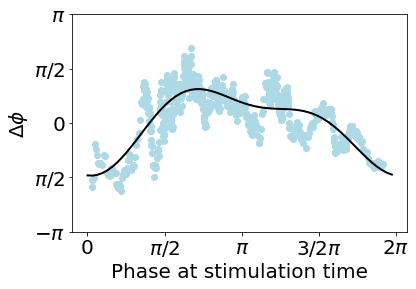

In [106]:
#1/(T0*10**-3), 1/(T1*10**-3)

plt.scatter(unii,mean,c = 'lightblue', marker = 'o')
theta = np.arange(0,2*np.pi,0.1)
plt.plot(theta, a0 + a1*np.cos(theta) + a2*np.cos(2*theta)+  b1*np.sin(theta) + b2*np.sin(2*theta), 'k', lw = 2 )
#plt.plot(theta, a01 + a11*np.cos(theta) + a21*np.cos(2*theta)+  b11*np.sin(theta) + b21*np.sin(2*theta),color = 'orange' )

plt.xticks(np.arange(0,2*np.pi + np.pi/2,np.pi/2), labels = ["0", "$\pi/2$","$\pi$","$3/2\pi$","$2\pi$"])
plt.yticks(np.arange(-np.pi,np.pi + np.pi/2,np.pi/2), labels = ["$-\pi$","$\pi/2$","$0$","$\pi/2$","$\pi$"])
plt.xlabel('Phase at stimulation time')
plt.ylabel(r'$\Delta \phi$');
#plt.savefig('Fig/PRC2s.jpg', dpi = 300, bbox_inches ='tight')

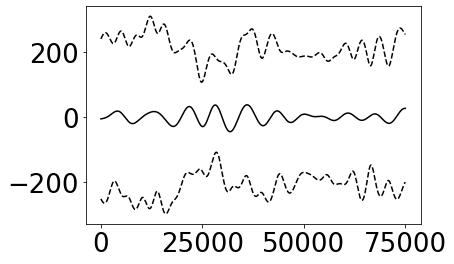

In [103]:
plt.plot(trials.mean(0), 'k')
#plt.plot(newdata[18,indexes[0]:indexes[0] +25000*2], 'r', lw = 2)
plt.plot(trials.mean(0) + trials.std(0)*2, 'k--')
plt.plot(trials.mean(0) -trials.std(0)*2, 'k--')

#plt.xlim(0,25000)

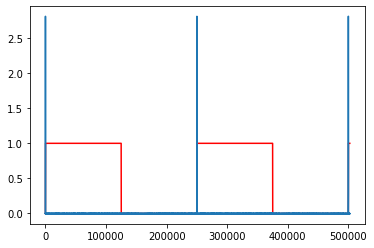

In [120]:
plt.plot(stim2[331300:333700+500000], 'r')
plt.plot(stim[331300:333700+500000])

In [179]:
stim2[81450+100000]

1.0

# Dataset 2 

In [5]:
import mat73
mat = mat73.loadmat("StimPiezo_001_210122_102100.mat");

/home/benny/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [6]:
matr = mat['amplifier_data']

In [7]:
stim = mat['adc_data']
stim2 = mat['dig_in_data']

In [120]:
from scipy import signal
import numpy as np
t = np.arange(0,len(matr[0]))*0.00004
dt = t[1]-t[0]
fs = 1/dt
nyq = 0.5*fs
lowcut =  3 - 1 # verificare questa frequenza dominante
highcut = 3 + 1
low = lowcut / nyq
high = highcut / nyq
order = 2
f, h = signal.butter(order,[low, high], btype='bandpass')


lowcut = 5
highcut = 150
low = lowcut / nyq
high = highcut / nyq
order = 2
f2, h2 = signal.butter(order,[low, high], btype='bandpass')
#newdata = np.empty((27,len(matr[0])))
lfp = np.empty((27,len(matr[0])))

for s in range(27):
    sig = matr[s,:]
    lfp[s,:] = signal.filtfilt(f2, h2, sig, padlen=150)    
    #newdata[s,:] = signal.filtfilt(f, h, sig, padlen=150)

In [85]:
def Thres(coef,x):
    """
    Calculates Quiroga detection threshold
    """
    return coef*np.median(np.abs(x)/0.6745) 

def findpeaks(sig, thres, choose):
    """
    Finds peaks in a time series.
    Set eventual other constraints in the scipy.signal function find_peaks
    """
    sig2 = np.zeros(sig.shape, dtype = int)
    if choose == "neg":
        p1 = find_peaks(-(sig - np.mean(sig)), height = thres, distance = 10)[0]
        if np.any(p1):
            sig2[p1] = 1
            
    if choose == "posneg":
        p1 = find_peaks(-(sig - np.mean(sig)), height = thres)[0]
        p2 = find_peaks((sig - np.mean(sig)), height = thres)[0]
        if np.any(p1.tolist() + p2.tolist()):
            sig2[np.array(p1.tolist()+ p2.tolist())] = 1
    return sig2

def firingrate(array, timebin=250):
    # array shape: trials x time x channels
    
    time = array.shape[1]
    rest = int(timebin)*int(time/timebin + 1) - int(time) 

    firingrates = np.zeros((array.shape[0],int((time + rest)/timebin), timebin))
    array = np.sum(array,2)

    for l in range(len(array)):
        firingrates[l] =np.append(array[l,:], np.zeros(rest)).reshape(int((time+rest)/timebin), timebin)

    firingrates = np.sum(firingrates, axis = 2)
    return firingrates

In [37]:
def RasterPlot(spikes,ax):
    #print(spikes.shape)
    idx = spikes > 0
    #print(idx)
    #print(idx.shape)
    times = np.arange(0,len(spikes),1)
    #print(times.shape)
    for l in range(spikes.shape[1]):
        x = times[idx[:,l]]
        ax.scatter(x, [l for i in range(len(x))], marker ='s', c = 'black',s = 1)

In [28]:
import matplotlib.pyplot as plt

In [66]:
from scipy import signal
import numpy as np
t = np.arange(0,len(matr[0]))*0.00004
dt = t[1]-t[0]
fs = 1/dt
nyq = 0.5*fs

lowcut = 300
highcut = 3000
low = lowcut / nyq
high = highcut / nyq
order = 2
f, h = signal.butter(order,high, btype='lowpass')
f2, h2 = signal.butter(order,low, btype='highpass')

spikes = np.empty((27,len(matr[0])))
#lfp = np.empty((27,len(matr[0])))

for s in range(27):
    sig = matr[s,:]
    #lfp[s,:] = signal.filtfilt(f2, h2, sig, padlen=150)    
    sig2 = signal.filtfilt(f, h, sig, padlen=150)
    spikes[s,:] = signal.filtfilt(f2, h2, sig2, padlen=150)    

In [67]:
indexes = (np.where(stim> 1.5)[0])[np.where(np.diff(np.where(stim> 1.5)[0])>1)]
indexes

array([  70932,  320931,  570930,  820929, 1070928, 1320928, 1570927,
       1820926, 2070925, 2320924, 2570923, 2820922, 3070921, 3320920,
       3570919, 3820918, 4070917, 4320916, 4570915, 4820914, 5070913,
       5320912, 5570911, 5820910, 6070909, 6320908, 6570907, 6820906,
       7070905])

In [68]:
num = len(indexes)
spikesTrials = np.zeros((num, 9*25000, 27))
for l in range(len(indexes)):
    spikesTrials[l] = spikes[:,indexes[l]:indexes[l]+9*25000].T

In [21]:
num = len(indexes)
lfpTrials = np.zeros((num, 9*25000, 27))
for l in range(len(indexes)):
    lfpTrials[l] = lfp[:,indexes[l]:indexes[l]+9*25000].T

In [73]:
binspikes =  np.zeros((num,int(25000*9),27))
for i in range(num):
    #array3Stim[g,i] = newdata[:,int(lis[i]):int(lis[i])+int(25000*2)].transpose()
    #array3StimSpikes[g,i] = newdataspikes[:,int(lis[i]):int(lis[i])+int(25000*2)].transpose()
    for ch in range(27):
        binspikes[i,:,ch] = findpeaks(spikesTrials[i,:,ch], Thres(3,spikesTrials[i,:,ch]),"neg")

In [127]:
timebin = 50
fir = firingrate(binspikes, timebin)

In [103]:
lfpTrials.shape

(29, 225000, 27)

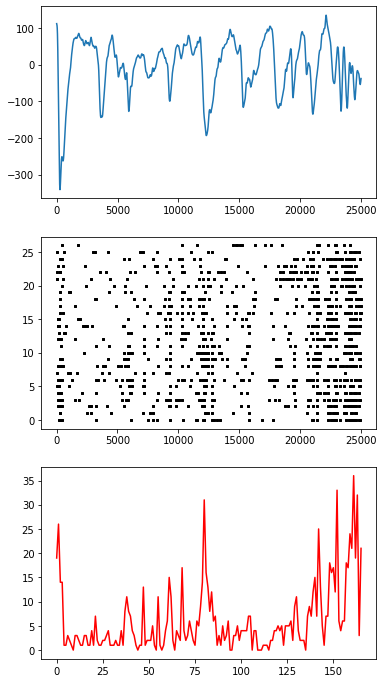

In [80]:
fig = plt.figure(figsize = (6,12))
trial = 0
time =25000

ax = fig.add_subplot(3,1,1)
ax.plot(lfpTrials[trial,:int(time),18])

ax = fig.add_subplot(3,1,2)
RasterPlot(binspikes[trial,:int(time)],ax)

ax = fig.add_subplot(3,1,3)
ax.plot(fir[trial,:int(time/timebin)], 'r');

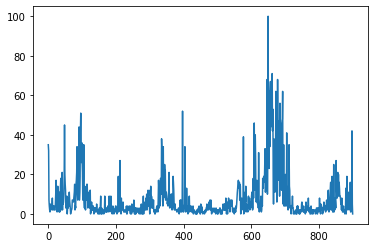

(0.0, 500000.0)

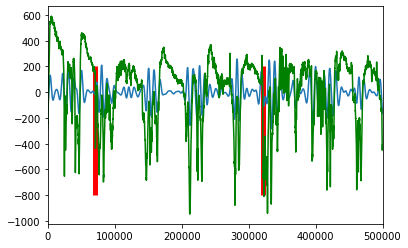

In [87]:
plt.vlines(indexes,-800,200, 'r', lw =5)
plt.plot(newdata[13,:25000*20])
plt.plot(lfp[13,:25000*20], 'g')

plt.xlim(0,25000*20)

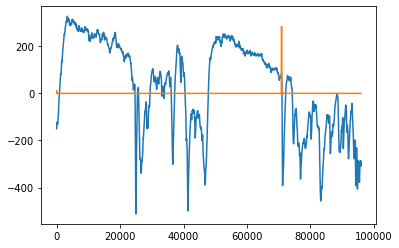

In [88]:
plt.plot(lfp[18,:indexes[0] + int(25000)])
plt.plot(stim[:indexes[0] + int(25000)]*100)

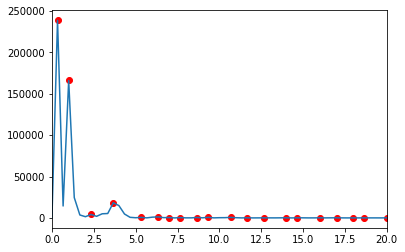

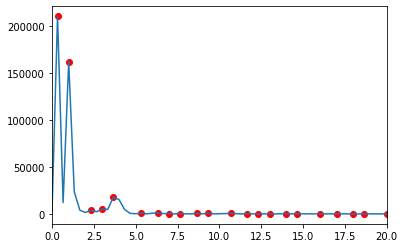

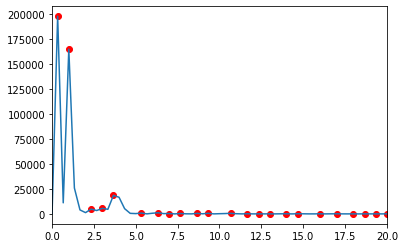

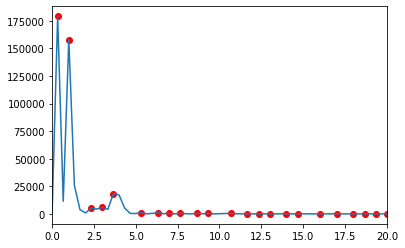

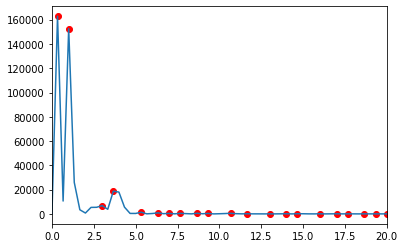

In [109]:
maxfreq= []
maxfreq2 = []
maxfreq3 = []

o = 0
for l in range(len(indexes)):
    for el in range(27):
        x,Pxx = signal.periodogram(lfp[el,indexes[l]  +  int(25000*6) :indexes[l]  +  int(25000*9)],fs = 1/0.00004)
        xmaxx = np.array(x)[np.array(findmaxima(Pxx)[:,0], dtype = int)][np.argsort(np.array(findmaxima(Pxx)[:,1]))[::-1]]
        maxfreq.append(xmaxx[0])
        maxfreq2.append(xmaxx[1])
        maxfreq3.append(xmaxx[2])
        
        o += 1
        if o < 6:
            plt.figure()
            xmaxx = np.array(x)[np.array(findmaxima(Pxx)[:,0], dtype = int)]
            maxx = np.array(findmaxima(Pxx)[:,1])
            plt.plot(xmaxx, maxx, 'ro')
            plt.plot(x,Pxx)
            plt.xlim(0,20)

In [110]:
np.array(maxfreq).mean(), np.array(maxfreq2).mean(),  np.array(maxfreq3).mean()

(0.6611323967645805, 1.7892720306513408, 2.715197956577266)

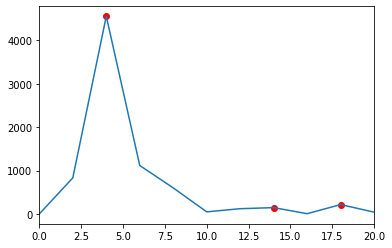

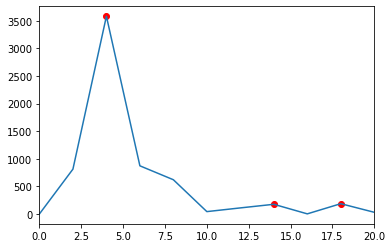

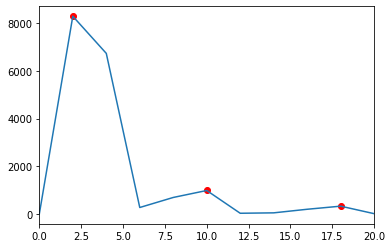

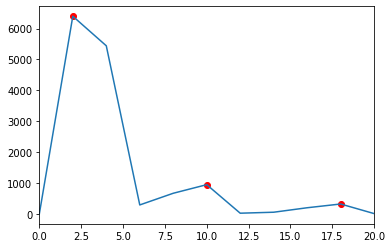

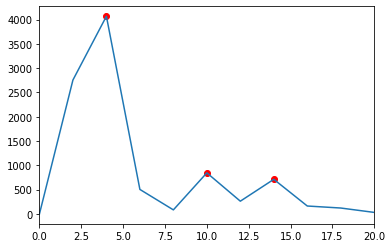

In [105]:
maxfreqstim = []
o = 0
maxfreq2stim = []
for l in range(len(indexes)):
    for el in range(17,19):
        x,Pxx = signal.periodogram(lfp[el,indexes[l] :indexes[l]  +  int(25000*0.5)],fs = 1/0.00004)
        xmaxx = np.array(x)[np.array(findmaxima(Pxx)[:,0], dtype = int)][np.argsort(np.array(findmaxima(Pxx)[:,1]))[::-1]]
        maxfreqstim.append(xmaxx[0])
        maxfreq2stim.append(xmaxx[1])
    
        o += 1
        if o < 6:
            plt.figure()
            xmaxx = np.array(x)[np.array(findmaxima(Pxx)[:,0], dtype = int)]
            maxx = np.array(findmaxima(Pxx)[:,1])
            plt.plot(xmaxx, maxx, 'ro')
            plt.plot(x,Pxx)
            plt.xlim(0,20)
            

In [106]:
np.array(maxfreqstim).mean(), np.array(maxfreq2stim).mean()

(4.0344827586206895, 9.448275862068966)

(0.0, 20.0)

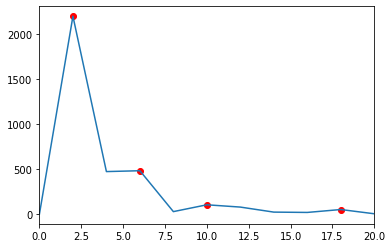

In [98]:
xmaxx = np.array(x)[np.array(findmaxima(Pxx)[:,0], dtype = int)]
maxx = np.array(findmaxima(Pxx)[:,1])
plt.plot(xmaxx, maxx, 'ro')
plt.plot(x,Pxx)
plt.xlim(0,20)

In [45]:
np.array(findmaxima(Pxx)[:,1]);

(0.0, 20.0)

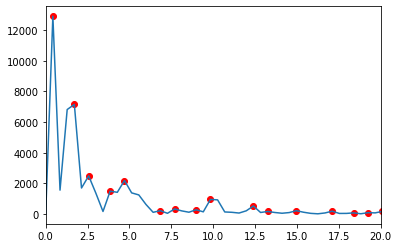

In [56]:
xmaxx = np.array(x)[np.array(findmaxima(Pxx)[:,0], dtype = int)]
maxx = np.array(findmaxima(Pxx)[:,1])
plt.plot(xmaxx, maxx, 'ro')
plt.plot(x,Pxx)
plt.xlim(0,20)

In [15]:
def R_helper_detector_LFP(_input):
    maxima=[]
    for i in range(1, len(_input)-1):
        if (_input[i-1] < _input[i] and _input[i] > _input[i+1]) and _input[i] > np.median(_input) : 
                maxima.append([i, _input[i]])
    maxima = np.array(maxima)
    return(maxima)

In [94]:
trials = []
for r in range(len(indexes)):
    for el in range(27):
        trials.append(newdata[el,indexes[r]-25000:indexes[r]+25000*2])

In [95]:
trials = np.array(trials)

In [55]:
trials.shape


(783, 75000)

## Phase response curve

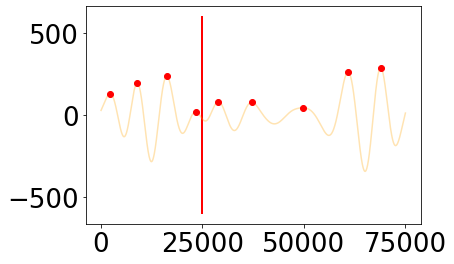

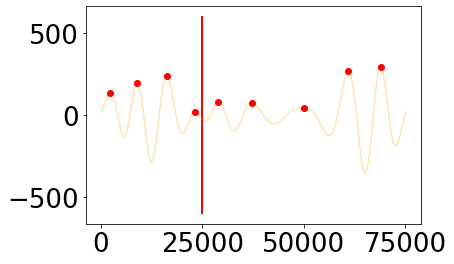

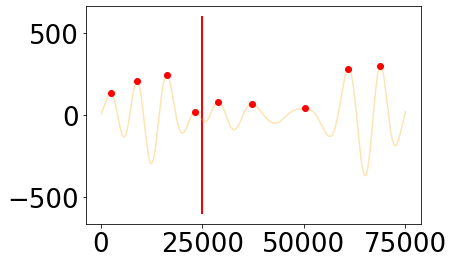

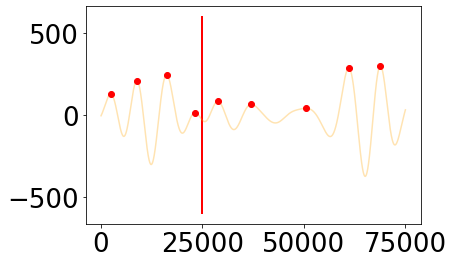

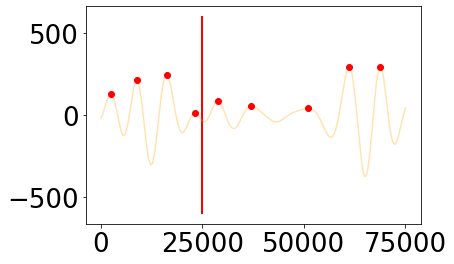

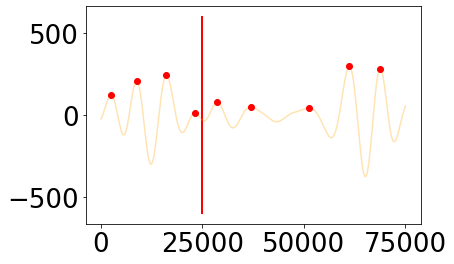

In [78]:
phasestim = []
phases = []
t_s = 25000
#t_s = 3051
o = 0

for trial in range(trials.shape[0]):
    #for elec in range(27):
    
    peaks =R_helper_detector_LFP(trials[trial,:])
    #print(peaks.shape)

    if trial < 6:
        plt.figure()
        plt.plot(trials[trial], 'orange', alpha = 0.3)

        plt.plot(peaks[:,0],peaks[:,1], 'ro')
        plt.vlines(t_s,-600,600, 'r', lw = 2)
        #plt.xlim(1000,1500)


    idx = np.where( (t_s- peaks[:,0]) == (t_s- peaks[:,0])[(t_s- peaks[:,0])>0].min())[0][0]
    time = peaks[:,0][idx]
    ts = t_s - time
    #t_s = 1110
    T0 =[]
    for r in range(len(peaks[:idx])):
        #print(len(peaks[:idx-1]))
        T0.append(peaks[:,0][idx-r] - peaks[:,0][idx -1-r])

    T0 = np.array(T0).mean()
    T1 = peaks[:,0][idx + 1] - peaks[:,0][idx]
    phase = (T0 - T1)/T0*2*np.pi
    phase_stim = ts/T0*2*np.pi
    if phase_stim > 2*np.pi: o+= 1
    f1 = np.sign(phase_stim)*(np.abs(phase_stim))%(2*np.pi)
    #print(phase_stim)
    #print(np.angle(np.exp(1j*phase_stim)) + np.pi, np.sign(phase_stim)*(np.abs(phase_stim))%(2*np.pi))
    phasestim.append(f1)
    #f2 = np.sign(phase)*(np.abs(phase))
    phases.append(np.angle(np.exp(1j*phase)))
    """
    if f2 > np.pi:
        phases.append(f2 - 2*np.pi)
    elif f2 < -np.pi:
        phases.append(f2 + 2*np.pi)
    else:
        phases.append(f2)
    """

In [105]:
plt.rcParams["axes.labelsize"] = 20
plt.rcParams["xtick.labelsize"] = 20
plt.rcParams["ytick.labelsize"] = 20

In [97]:
phases = np.array(phases)
phasestim = np.array(phasestim)
phases = phases[np.argsort(phasestim)]
phasestim = np.sort(phasestim)

for g in range(len(phasestim)):
    phasestim[g] = round(phasestim[g],3)
uni = np.unique(phasestim)
uniphases = [[] for r in range(len(uni))]
for l in range(len(uni)):
    for r in range(len(phases)):
        if phasestim[r] == uni[l]:
            uniphases[l].append(phases[r])

In [98]:
means = []
stds =[]
for r in range(len(uniphases)):
    means.append(np.mean(uniphases[r]))
    stds.append(np.std(uniphases[r])/np.sqrt(len(uniphases[r])))    

In [99]:
means,stds = np.array(means), np.array(stds)
#uniphases = np.array(uniphases)

In [100]:
mean = my_moving_window(means,10)
std = my_moving_window(stds,10)
unii = my_moving_window(uni,10)

## Fit of Fourier Coefficients

In [101]:
y = np.array(means)
oss01 = np.ones((len(uni)))
oss1 = np.cos(uni)
oss2 = np.cos(2*uni)
#oss02 = np.ones((len(unii)))
oss3 = np.sin(uni)
oss4 = np.sin(2*uni)

X = np.vstack((oss1,oss2,oss3,oss4,oss01)).T
a1,a2,b1,b2,a0= (np.linalg.inv(X.T @ X) @ X.T) @ y

$\beta = (X^T X)^{-1} X^T y$

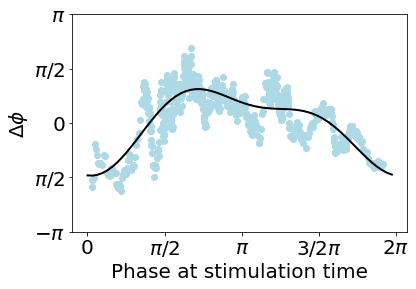

In [106]:
#1/(T0*10**-3), 1/(T1*10**-3)

plt.scatter(unii,mean,c = 'lightblue', marker = 'o')
theta = np.arange(0,2*np.pi,0.1)
plt.plot(theta, a0 + a1*np.cos(theta) + a2*np.cos(2*theta)+  b1*np.sin(theta) + b2*np.sin(2*theta), 'k', lw = 2 )
#plt.plot(theta, a01 + a11*np.cos(theta) + a21*np.cos(2*theta)+  b11*np.sin(theta) + b21*np.sin(2*theta),color = 'orange' )

plt.xticks(np.arange(0,2*np.pi + np.pi/2,np.pi/2), labels = ["0", "$\pi/2$","$\pi$","$3/2\pi$","$2\pi$"])
plt.yticks(np.arange(-np.pi,np.pi + np.pi/2,np.pi/2), labels = ["$-\pi$","$\pi/2$","$0$","$\pi/2$","$\pi$"])
plt.xlabel('Phase at stimulation time')
plt.ylabel(r'$\Delta \phi$');
#plt.savefig('Fig/PRC2s.jpg', dpi = 300, bbox_inches ='tight')

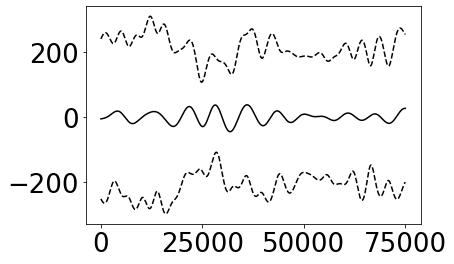

In [103]:
plt.plot(trials.mean(0), 'k')
#plt.plot(newdata[18,indexes[0]:indexes[0] +25000*2], 'r', lw = 2)
plt.plot(trials.mean(0) + trials.std(0)*2, 'k--')
plt.plot(trials.mean(0) -trials.std(0)*2, 'k--')

#plt.xlim(0,25000)

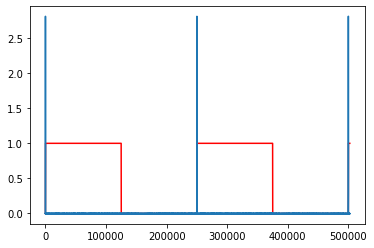

In [120]:
plt.plot(stim2[331300:333700+500000], 'r')
plt.plot(stim[331300:333700+500000])

# Dataset 3 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
cd ../../../Downloads/

/home/benny/Downloads


In [6]:
cd xBenedetta

/home/benny/Downloads/xBenedetta


In [7]:
import mat73
mat = mat73.loadmat("StimPiezo_002_210209_120836.mat");

In [8]:
matr = mat['amplifier_data']

In [9]:
stim = mat['adc_data']
stim2 = mat['dig_in_data']

In [10]:
from scipy import signal
import numpy as np
t = np.arange(0,len(matr[0]))*0.00004
dt = t[1]-t[0]
fs = 1/dt
nyq = 0.5*fs
lowcut =  3 - 1 # verificare questa frequenza dominante
highcut = 3 + 1
low = lowcut / nyq
high = highcut / nyq
order = 2
f, h = signal.butter(order,[low, high], btype='bandpass')


lowcut = 0.1
highcut = 150
low = lowcut / nyq
high = highcut / nyq
order = 2
f2, h2 = signal.butter(order,[low, high], btype='bandpass')
newdata = np.empty((27,len(matr[0])))
lfp = np.empty((27,len(matr[0])))

for s in range(27):
    sig = matr[s,:]
    lfp[s,:] = signal.filtfilt(f2, h2, sig, padlen=150)    
    newdata[s,:] = signal.filtfilt(f, h, sig, padlen=150)

In [11]:
indexes = (np.where(stim> 1.5)[0])[np.where(np.diff(np.where(stim> 1.5)[0])>1)]
indexes

array([ 241474,  491472,  741470,  991468, 1241467, 1491465, 1741463,
       1991461, 2241459, 2491457, 2741455, 2991453, 3241452, 3491450,
       3741448, 3991446, 4241444, 4491442, 4741440, 4991438, 5241437,
       5491435, 5741433, 5991431, 6241429, 6491427, 6741425, 6991423,
       7241421])

In [12]:
np.diff(indexes)

array([249998, 249998, 249998, 249999, 249998, 249998, 249998, 249998,
       249998, 249998, 249998, 249999, 249998, 249998, 249998, 249998,
       249998, 249998, 249998, 249999, 249998, 249998, 249998, 249998,
       249998, 249998, 249998, 249998])

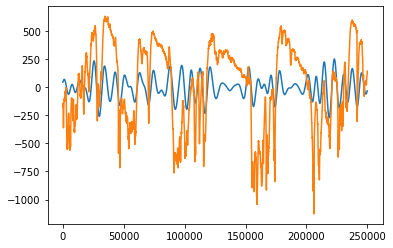

In [13]:
import matplotlib.pyplot as plt
plt.plot(newdata[13,:25000*10])
plt.plot(lfp[13,:25000*10])

(0.0, 500000.0)

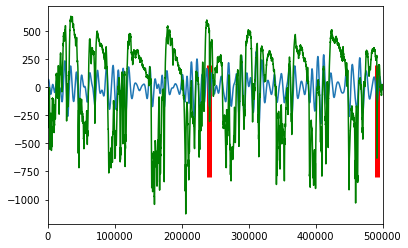

In [14]:
plt.vlines(indexes,-800,200, 'r', lw =5)
plt.plot(newdata[13,:25000*20])
plt.plot(lfp[13,:25000*20], 'g')

plt.xlim(0,25000*20)

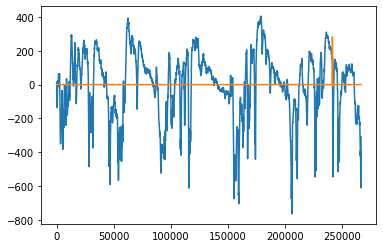

In [15]:
plt.plot(lfp[18,:indexes[0] + int(25000)])
plt.plot(stim[:indexes[0] + int(25000)]*100)

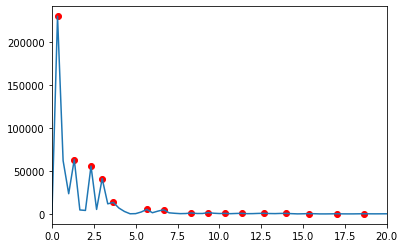

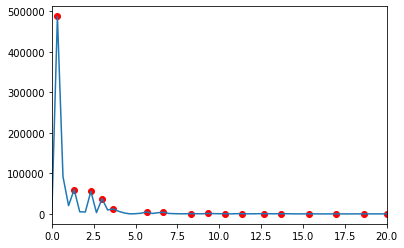

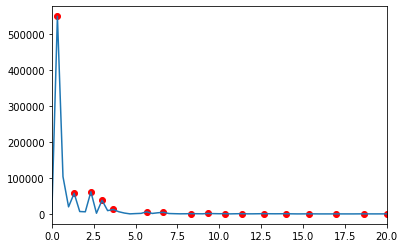

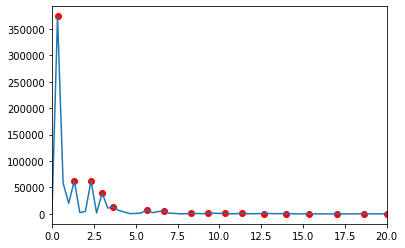

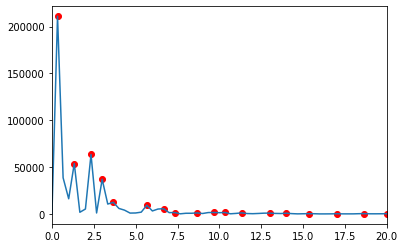

In [18]:
maxfreq= []
maxfreq2 = []
maxfreq3 = []

o = 0
for l in range(len(indexes)):
    for el in range(27):
        x,Pxx = signal.periodogram(lfp[el,indexes[l]  +  int(25000*6) :indexes[l]  +  int(25000*9)],fs = 1/0.00004)
        xmaxx = np.array(x)[np.array(findmaxima(Pxx)[:,0], dtype = int)][np.argsort(np.array(findmaxima(Pxx)[:,1]))[::-1]]
        maxfreq.append(xmaxx[0])
        maxfreq2.append(xmaxx[1])
        maxfreq3.append(xmaxx[2])
        
        o += 1
        if o < 6:
            plt.figure()
            xmaxx = np.array(x)[np.array(findmaxima(Pxx)[:,0], dtype = int)]
            maxx = np.array(findmaxima(Pxx)[:,1])
            plt.plot(xmaxx, maxx, 'ro')
            plt.plot(x,Pxx)
            plt.xlim(0,20)

In [19]:
np.array(maxfreq).mean(), np.array(maxfreq2).mean(),  np.array(maxfreq3).mean()

(0.5372498935717325, 2.093231162196679, 3.1132396764580665)

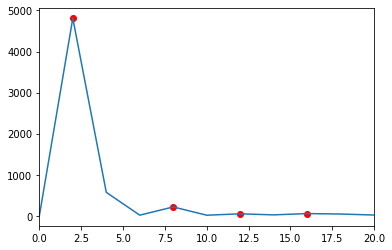

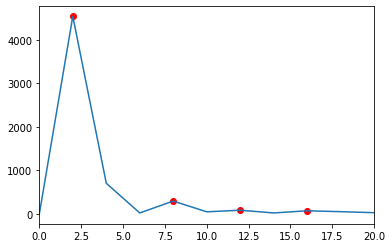

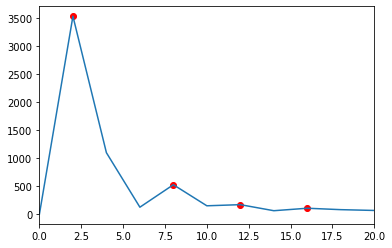

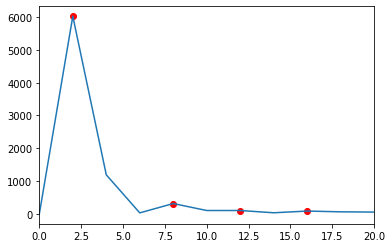

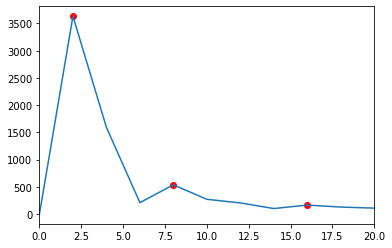

In [23]:
maxfreqstim = []
o = 0
maxfreq2stim = []
for l in range(len(indexes)):
    for el in range(27):
        x,Pxx = signal.periodogram(lfp[el,indexes[l] :indexes[l]  +  int(25000*0.5)],fs = 1/0.00004)
        xmaxx = np.array(x)[np.array(findmaxima(Pxx)[:,0], dtype = int)][np.argsort(np.array(findmaxima(Pxx)[:,1]))[::-1]]
        maxfreqstim.append(xmaxx[0])
        maxfreq2stim.append(xmaxx[1])
    
        o += 1
        if o < 6:
            plt.figure()
            xmaxx = np.array(x)[np.array(findmaxima(Pxx)[:,0], dtype = int)]
            maxx = np.array(findmaxima(Pxx)[:,1])
            plt.plot(xmaxx, maxx, 'ro')
            plt.plot(x,Pxx)
            plt.xlim(0,20)
            

In [24]:
np.array(maxfreqstim).mean(), np.array(maxfreq2stim).mean()

(3.3409961685823757, 10.44955300127714)

(0.0, 20.0)

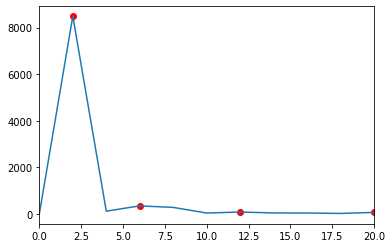

In [25]:
xmaxx = np.array(x)[np.array(findmaxima(Pxx)[:,0], dtype = int)]
maxx = np.array(findmaxima(Pxx)[:,1])
plt.plot(xmaxx, maxx, 'ro')
plt.plot(x,Pxx)
plt.xlim(0,20)

In [45]:
np.array(findmaxima(Pxx)[:,1]);

(0.0, 20.0)

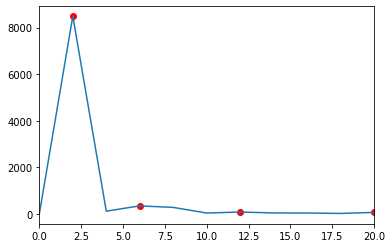

In [26]:
xmaxx = np.array(x)[np.array(findmaxima(Pxx)[:,0], dtype = int)]
maxx = np.array(findmaxima(Pxx)[:,1])
plt.plot(xmaxx, maxx, 'ro')
plt.plot(x,Pxx)
plt.xlim(0,20)

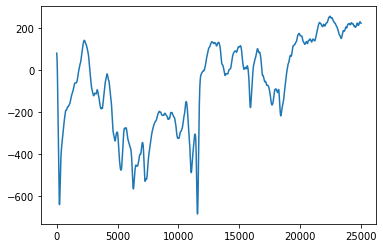

In [32]:
el =18
l = 2
plt.plot(lfp[el,indexes[l] :indexes[l]  +  int(25000)])

# Dataset 4

In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:
cd ../../../Downloads/

[Errno 2] No such file or directory: '../../../Downloads/'
/home/benny/Downloads/xBenedetta


In [6]:
cd xBenedetta

/home/benny/Downloads/xBenedetta


In [7]:
import mat73
mat = mat73.loadmat("StimPiezo_002_210210_120530.mat");

/home/benny/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [8]:
matr = mat['amplifier_data']

In [9]:
stim = mat['adc_data']
stim2 = mat['dig_in_data']

In [23]:
from scipy import signal
import numpy as np
t = np.arange(0,len(matr[0]))*0.00004
dt = t[1]-t[0]
fs = 1/dt
nyq = 0.5*fs
lowcut =  3 - 1 # verificare questa frequenza dominante
highcut = 3 + 1
low = lowcut / nyq
high = highcut / nyq
order = 2
f, h = signal.butter(order,[low, high], btype='bandpass')


lowcut = 5
highcut = 150
low = lowcut / nyq
high = highcut / nyq
order = 2
f2, h2 = signal.butter(order,[low, high], btype='bandpass')
newdata = np.empty((27,len(matr[0])))
lfp = np.empty((27,len(matr[0])))

for s in range(27):
    sig = matr[s,:]
    lfp[s,:] = signal.filtfilt(f2, h2, sig, padlen=150)    
    newdata[s,:] = signal.filtfilt(f, h, sig, padlen=150)

In [24]:
indexes = (np.where(stim> 1.5)[0])[np.where(np.diff(np.where(stim> 1.5)[0])>1)]
indexes

array([ 162170,  412169,  662167,  912165, 1162163, 1412161, 1662159,
       1912158, 2162156, 2412154, 2662152, 2912150, 3162149, 3412147,
       3662145, 3912143, 4162141, 4412139, 4662138, 4912136, 5162134,
       5412132, 5662130, 5912129, 6162127, 6412125, 6662123, 6912121,
       7162119])

In [12]:
np.diff(indexes)

array([249999, 249998, 249998, 249998, 249998, 249998, 249999, 249998,
       249998, 249998, 249998, 249999, 249998, 249998, 249998, 249998,
       249998, 249999, 249998, 249998, 249998, 249998, 249999, 249998,
       249998, 249998, 249998, 249998])

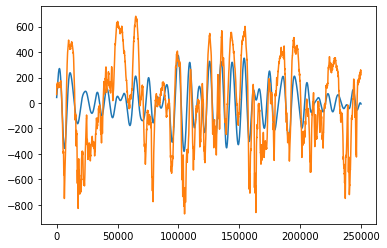

In [13]:
import matplotlib.pyplot as plt
plt.plot(newdata[13,:25000*10])
plt.plot(lfp[13,:25000*10])

(0.0, 500000.0)

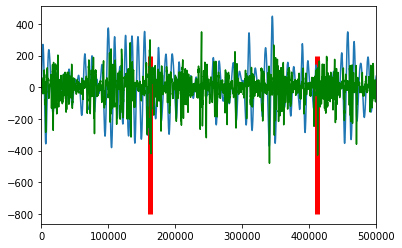

In [26]:
plt.vlines(indexes,-800,200, 'r', lw =5)
plt.plot(newdata[13,:25000*20])
plt.plot(lfp[13,:25000*20], 'g')

plt.xlim(0,25000*20)

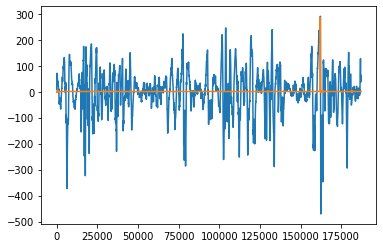

In [25]:
plt.plot(lfp[18,:indexes[0] + int(25000)])
plt.plot(stim[:indexes[0] + int(25000)]*100)

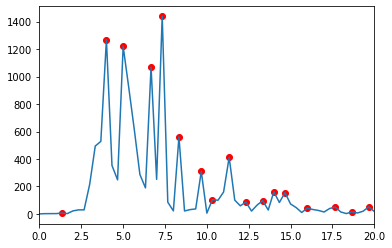

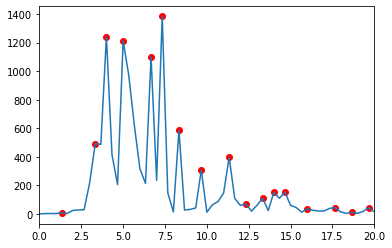

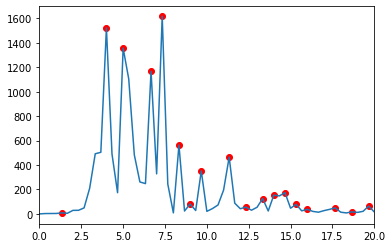

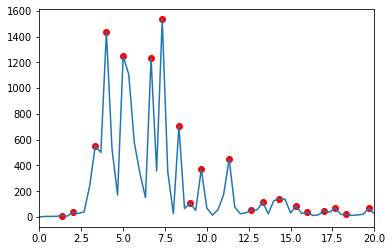

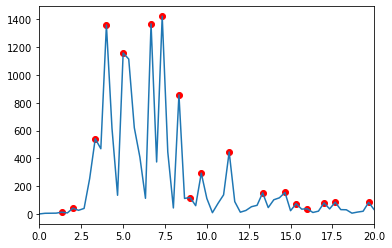

In [27]:
maxfreq= []
maxfreq2 = []
maxfreq3 = []

o = 0
for l in range(len(indexes)):
    for el in range(27):
        x,Pxx = signal.periodogram(lfp[el,indexes[l]  +  int(25000*6) :indexes[l]  +  int(25000*9)],fs = 1/0.00004)
        xmaxx = np.array(x)[np.array(findmaxima(Pxx)[:,0], dtype = int)][np.argsort(np.array(findmaxima(Pxx)[:,1]))[::-1]]
        maxfreq.append(xmaxx[0])
        maxfreq2.append(xmaxx[1])
        maxfreq3.append(xmaxx[2])
        
        o += 1
        if o < 6:
            plt.figure()
            xmaxx = np.array(x)[np.array(findmaxima(Pxx)[:,0], dtype = int)]
            maxx = np.array(findmaxima(Pxx)[:,1])
            plt.plot(xmaxx, maxx, 'ro')
            plt.plot(x,Pxx)
            plt.xlim(0,20)

In [17]:
np.array(maxfreq).mean(), np.array(maxfreq2).mean(),  np.array(maxfreq3).mean()

(1.0970625798212001, 2.032779906343124, 2.7986377181779476)

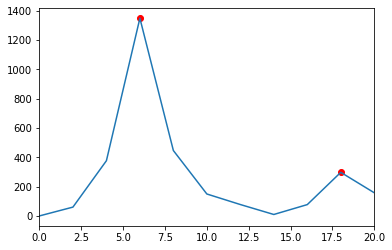

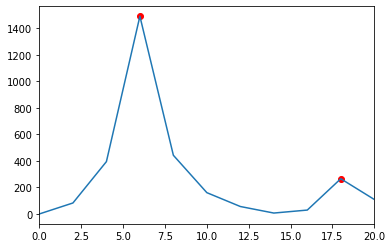

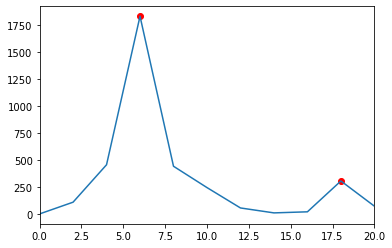

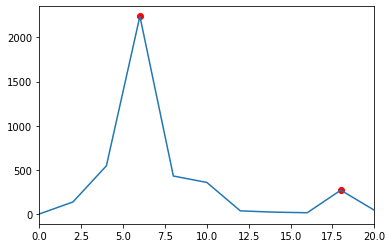

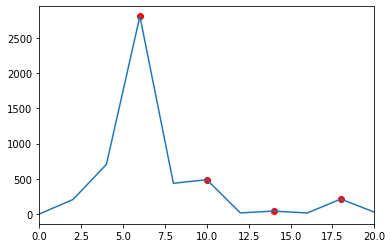

In [28]:
maxfreqstim = []
o = 0
maxfreq2stim = []
for l in range(len(indexes)):
    for el in range(27):
        x,Pxx = signal.periodogram(lfp[el,indexes[l] :indexes[l]  +  int(25000*0.5)],fs = 1/0.00004)
        xmaxx = np.array(x)[np.array(findmaxima(Pxx)[:,0], dtype = int)][np.argsort(np.array(findmaxima(Pxx)[:,1]))[::-1]]
        maxfreqstim.append(xmaxx[0])
        maxfreq2stim.append(xmaxx[1])
    
        o += 1
        if o < 6:
            plt.figure()
            xmaxx = np.array(x)[np.array(findmaxima(Pxx)[:,0], dtype = int)]
            maxx = np.array(findmaxima(Pxx)[:,1])
            plt.plot(xmaxx, maxx, 'ro')
            plt.plot(x,Pxx)
            plt.xlim(0,20)
            

In [29]:
np.array(maxfreqstim).mean(), np.array(maxfreq2stim).mean()

(8.378033205619413, 10.457215836526181)

(0.0, 20.0)

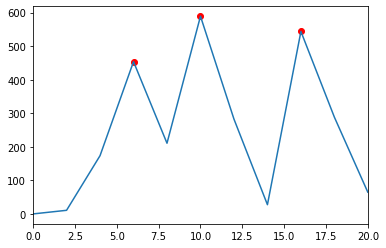

In [30]:
xmaxx = np.array(x)[np.array(findmaxima(Pxx)[:,0], dtype = int)]
maxx = np.array(findmaxima(Pxx)[:,1])
plt.plot(xmaxx, maxx, 'ro')
plt.plot(x,Pxx)
plt.xlim(0,20)

In [45]:
np.array(findmaxima(Pxx)[:,1]);

(0.0, 20.0)

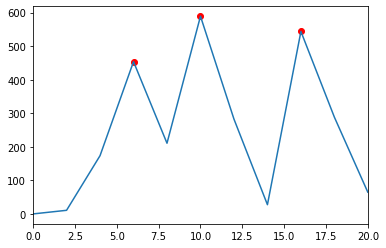

In [31]:
xmaxx = np.array(x)[np.array(findmaxima(Pxx)[:,0], dtype = int)]
maxx = np.array(findmaxima(Pxx)[:,1])
plt.plot(xmaxx, maxx, 'ro')
plt.plot(x,Pxx)
plt.xlim(0,20)

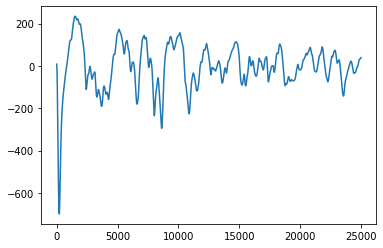

In [32]:
el =18
l = 2
plt.plot(lfp[el,indexes[l] :indexes[l]  +  int(25000)])

# Dataset 5

In [9]:
import numpy as np
import matplotlib.pyplot as plt

In [10]:
cd ../../../Downloads/

/home/benny/Downloads


In [11]:
cd xBenedetta

/home/benny/Downloads/xBenedetta


In [13]:
import mat73
mat = mat73.loadmat("StimPiezo_002_210211_114350.mat");

In [34]:
matr = mat['amplifier_data']

In [35]:
stim = mat['adc_data']
stim2 = mat['dig_in_data']

In [36]:
from scipy import signal
import numpy as np
t = np.arange(0,len(matr[0]))*0.00004
dt = t[1]-t[0]
fs = 1/dt
nyq = 0.5*fs
lowcut =  3 - 1 # verificare questa frequenza dominante
highcut = 3 + 1
low = lowcut / nyq
high = highcut / nyq
order = 2
f, h = signal.butter(order,[low, high], btype='bandpass')


lowcut = 5
highcut = 150
low = lowcut / nyq
high = highcut / nyq
order = 2
f2, h2 = signal.butter(order,[low, high], btype='bandpass')
newdata = np.empty((27,len(matr[0])))
lfp = np.empty((27,len(matr[0])))

for s in range(27):
    sig = matr[s,:]
    lfp[s,:] = signal.filtfilt(f2, h2, sig, padlen=150)    
    newdata[s,:] = signal.filtfilt(f, h, sig, padlen=150)

In [37]:
indexes = (np.where(stim> 1.5)[0])[np.where(np.diff(np.where(stim> 1.5)[0])>1)]
indexes

array([ 214658,  464656,  714654,  964652, 1214650, 1464648, 1714647,
       1964645, 2214643, 2464641, 2714639, 2964638, 3214636, 3464634,
       3714632, 3964630, 4214629, 4464627, 4714625, 4964623, 5214621,
       5464619, 5714618, 5964616, 6214614, 6464612, 6714610, 6964609,
       7214607])

In [38]:
np.diff(indexes)

array([249998, 249998, 249998, 249998, 249998, 249999, 249998, 249998,
       249998, 249998, 249999, 249998, 249998, 249998, 249998, 249999,
       249998, 249998, 249998, 249998, 249998, 249999, 249998, 249998,
       249998, 249998, 249999, 249998])

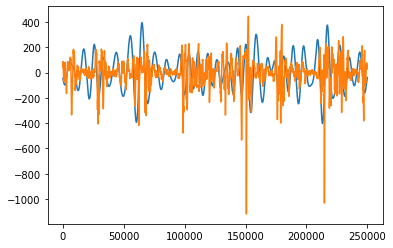

In [39]:
import matplotlib.pyplot as plt
plt.plot(newdata[13,:25000*10])
plt.plot(lfp[13,:25000*10])

(0.0, 500000.0)

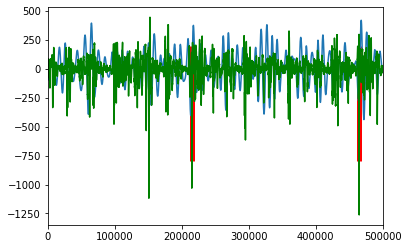

In [40]:
plt.vlines(indexes,-800,200, 'r', lw =5)
plt.plot(newdata[13,:25000*20])
plt.plot(lfp[13,:25000*20], 'g')

plt.xlim(0,25000*20)

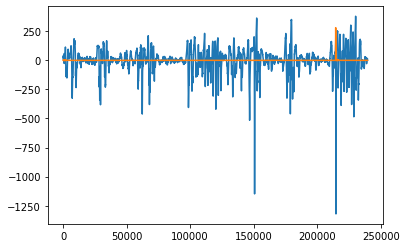

In [41]:
plt.plot(lfp[18,:indexes[0] + int(25000)])
plt.plot(stim[:indexes[0] + int(25000)]*100)

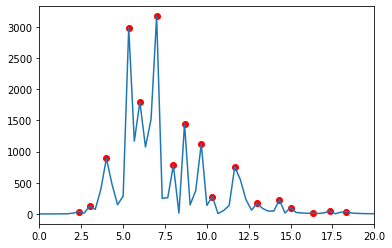

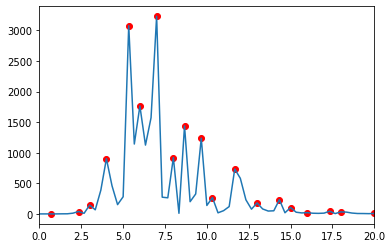

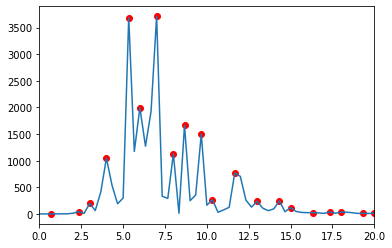

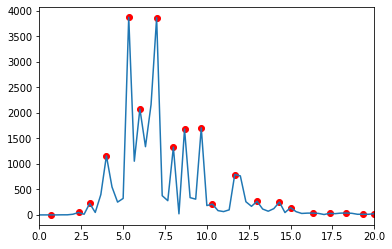

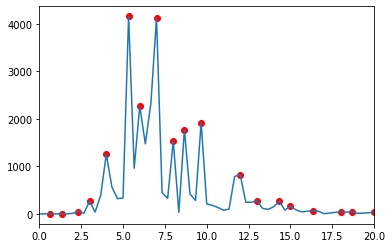

In [42]:
maxfreq= []
maxfreq2 = []
maxfreq3 = []

o = 0
for l in range(len(indexes)):
    for el in range(27):
        x,Pxx = signal.periodogram(lfp[el,indexes[l]  +  int(25000*6) :indexes[l]  +  int(25000*9)],fs = 1/0.00004)
        xmaxx = np.array(x)[np.array(findmaxima(Pxx)[:,0], dtype = int)][np.argsort(np.array(findmaxima(Pxx)[:,1]))[::-1]]
        maxfreq.append(xmaxx[0])
        maxfreq2.append(xmaxx[1])
        maxfreq3.append(xmaxx[2])
        
        o += 1
        if o < 6:
            plt.figure()
            xmaxx = np.array(x)[np.array(findmaxima(Pxx)[:,0], dtype = int)]
            maxx = np.array(findmaxima(Pxx)[:,1])
            plt.plot(xmaxx, maxx, 'ro')
            plt.plot(x,Pxx)
            plt.xlim(0,20)

In [43]:
np.array(maxfreq).mean(), np.array(maxfreq2).mean(),  np.array(maxfreq3).mean()

(7.035759897828861, 7.512132822477649, 8.020008514261386)

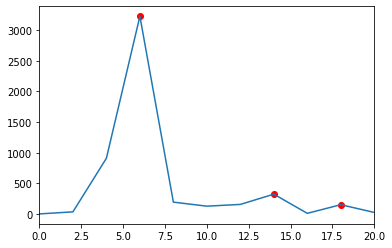

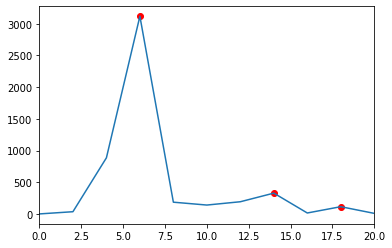

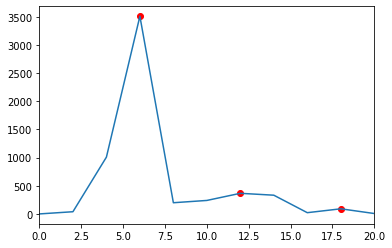

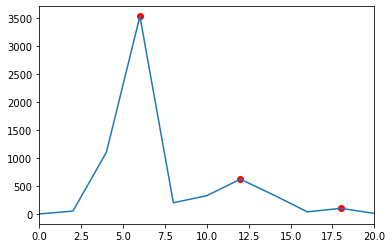

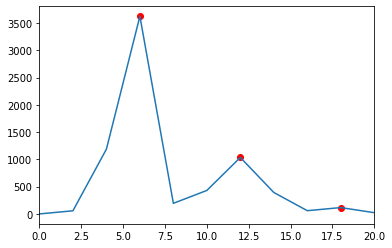

In [44]:
maxfreqstim = []
o = 0
maxfreq2stim = []
for l in range(len(indexes)):
    for el in range(27):
        x,Pxx = signal.periodogram(lfp[el,indexes[l] :indexes[l]  +  int(25000*0.5)],fs = 1/0.00004)
        xmaxx = np.array(x)[np.array(findmaxima(Pxx)[:,0], dtype = int)][np.argsort(np.array(findmaxima(Pxx)[:,1]))[::-1]]
        maxfreqstim.append(xmaxx[0])
        maxfreq2stim.append(xmaxx[1])
    
        o += 1
        if o < 6:
            plt.figure()
            xmaxx = np.array(x)[np.array(findmaxima(Pxx)[:,0], dtype = int)]
            maxx = np.array(findmaxima(Pxx)[:,1])
            plt.plot(xmaxx, maxx, 'ro')
            plt.plot(x,Pxx)
            plt.xlim(0,20)
            

In [45]:
np.array(maxfreqstim).mean(), np.array(maxfreq2stim).mean()

(8.899106002554278, 12.996168582375478)

(0.0, 20.0)

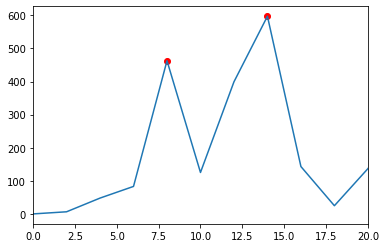

In [46]:
xmaxx = np.array(x)[np.array(findmaxima(Pxx)[:,0], dtype = int)]
maxx = np.array(findmaxima(Pxx)[:,1])
plt.plot(xmaxx, maxx, 'ro')
plt.plot(x,Pxx)
plt.xlim(0,20)

In [45]:
np.array(findmaxima(Pxx)[:,1]);

(0.0, 20.0)

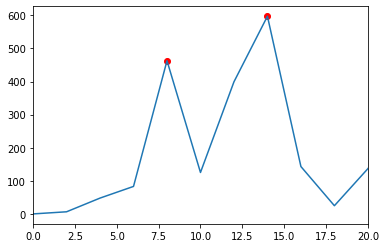

In [47]:
xmaxx = np.array(x)[np.array(findmaxima(Pxx)[:,0], dtype = int)]
maxx = np.array(findmaxima(Pxx)[:,1])
plt.plot(xmaxx, maxx, 'ro')
plt.plot(x,Pxx)
plt.xlim(0,20)

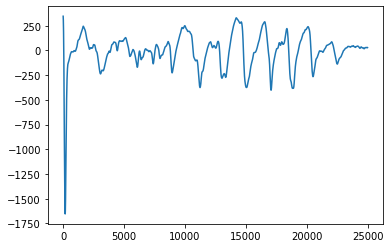

In [48]:
el =18
l = 2
plt.plot(lfp[el,indexes[l] :indexes[l]  +  int(25000)])

# Dataset 6 

In [6]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:
cd ../../../Downloads/

[Errno 2] No such file or directory: '../../../Downloads/'
/home/benny/Downloads/xBenedetta


In [6]:
cd xBenedetta

/home/benny/Downloads/xBenedetta


In [14]:
import mat73
mat = mat73.loadmat("StimPiezo_210119_123701.mat");

In [15]:
matr = mat['amplifier_data']

In [16]:
stim = mat['adc_data']
stim2 = mat['dig_in_data']

In [19]:
from scipy import signal
import numpy as np
t = np.arange(0,len(matr[0]))*0.00004
dt = t[1]-t[0]
fs = 1/dt
nyq = 0.5*fs
lowcut =  3 - 1 # verificare questa frequenza dominante
highcut = 3 + 1
low = lowcut / nyq
high = highcut / nyq
order = 2
f, h = signal.butter(order,[low, high], btype='bandpass')


lowcut = 0.1
highcut = 150
low = lowcut / nyq
high = highcut / nyq
order = 2
f2, h2 = signal.butter(order,[low, high], btype='bandpass')
newdata = np.empty((27,len(matr[0])))
lfp = np.empty((27,len(matr[0])))

for s in range(27):
    sig = matr[s,:]
    lfp[s,:] = signal.filtfilt(f2, h2, sig, padlen=150)    
    newdata[s,:] = signal.filtfilt(f, h, sig, padlen=150)

In [20]:
indexes = (np.where(stim> 1.5)[0])[np.where(np.diff(np.where(stim> 1.5)[0])>1)]
indexes

array([ 202562,  452560,  702558,  952557, 1202555, 1452553, 1702552,
       1952550, 2202548, 2452546, 2702545, 2952543, 3202541, 3452539,
       3702538, 3952536, 4202534, 4452533, 4702531, 4952529, 5202527,
       5452526, 5702524, 5952522, 6202520, 6452519, 6702517, 6952515,
       7202514])

In [21]:
np.diff(indexes)

array([249998, 249998, 249999, 249998, 249998, 249999, 249998, 249998,
       249998, 249999, 249998, 249998, 249998, 249999, 249998, 249998,
       249999, 249998, 249998, 249998, 249999, 249998, 249998, 249998,
       249999, 249998, 249998, 249999])

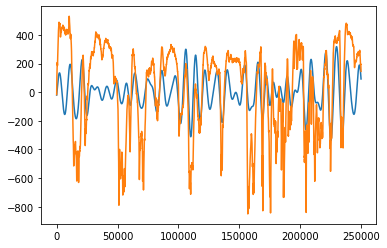

In [22]:
import matplotlib.pyplot as plt
plt.plot(newdata[13,:25000*10])
plt.plot(lfp[13,:25000*10])

(0.0, 500000.0)

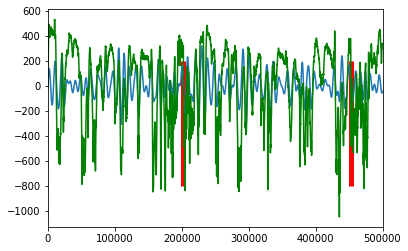

In [23]:
plt.vlines(indexes,-800,200, 'r', lw =5)
plt.plot(newdata[13,:25000*20])
plt.plot(lfp[13,:25000*20], 'g')

plt.xlim(0,25000*20)

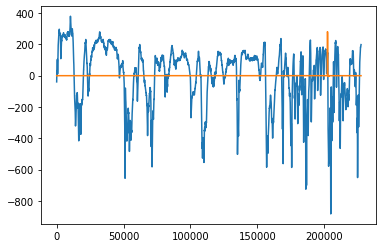

In [24]:
plt.plot(lfp[18,:indexes[0] + int(25000)])
plt.plot(stim[:indexes[0] + int(25000)]*100)

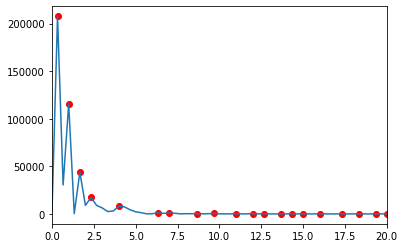

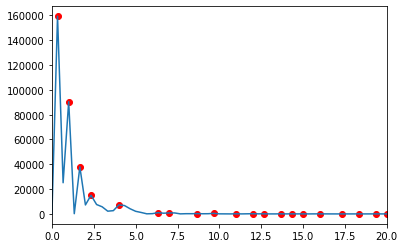

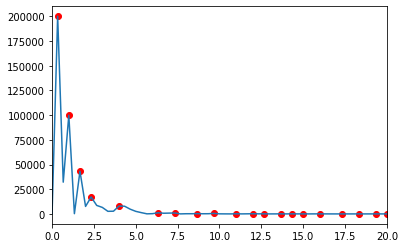

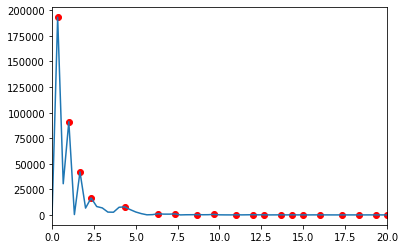

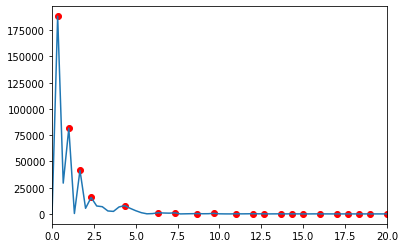

In [25]:
maxfreq= []
maxfreq2 = []
maxfreq3 = []

o = 0
for l in range(len(indexes)):
    for el in range(27):
        x,Pxx = signal.periodogram(lfp[el,indexes[l]  +  int(25000*6) :indexes[l]  +  int(25000*9)],fs = 1/0.00004)
        xmaxx = np.array(x)[np.array(findmaxima(Pxx)[:,0], dtype = int)][np.argsort(np.array(findmaxima(Pxx)[:,1]))[::-1]]
        maxfreq.append(xmaxx[0])
        maxfreq2.append(xmaxx[1])
        maxfreq3.append(xmaxx[2])
        
        o += 1
        if o < 6:
            plt.figure()
            xmaxx = np.array(x)[np.array(findmaxima(Pxx)[:,0], dtype = int)]
            maxx = np.array(findmaxima(Pxx)[:,1])
            plt.plot(xmaxx, maxx, 'ro')
            plt.plot(x,Pxx)
            plt.xlim(0,20)

In [26]:
np.array(maxfreq).mean(), np.array(maxfreq2).mean(),  np.array(maxfreq3).mean()

(0.7782034908471687, 2.01745423584504, 3.1013197105151122)

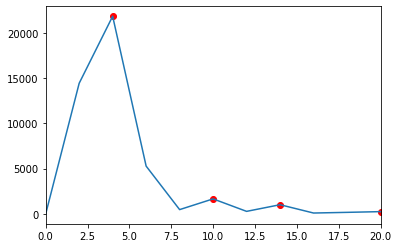

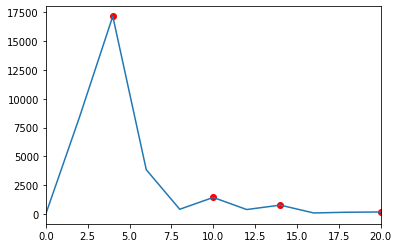

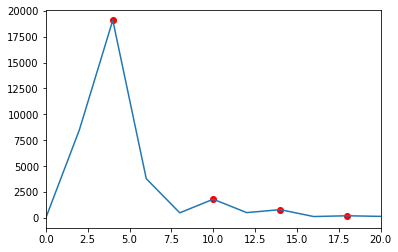

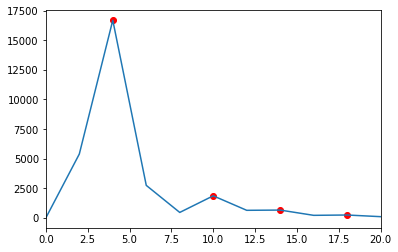

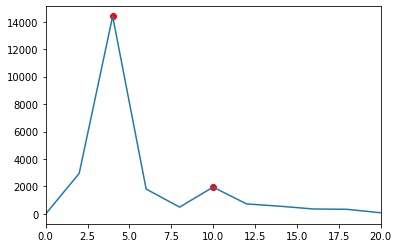

In [29]:
maxfreqstim = []
o = 0
maxfreq2stim = []
for l in range(len(indexes)):
    for el in range(27):
        x,Pxx = signal.periodogram(lfp[el,indexes[l] :indexes[l]  +  int(25000*0.5)],fs = 1/0.00004)
        xmaxx = np.array(x)[np.array(findmaxima(Pxx)[:,0], dtype = int)][np.argsort(np.array(findmaxima(Pxx)[:,1]))[::-1]]
        maxfreqstim.append(xmaxx[0])
        maxfreq2stim.append(xmaxx[1])
    
        o += 1
        if o < 6:
            plt.figure()
            xmaxx = np.array(x)[np.array(findmaxima(Pxx)[:,0], dtype = int)]
            maxx = np.array(findmaxima(Pxx)[:,1])
            plt.plot(xmaxx, maxx, 'ro')
            plt.plot(x,Pxx)
            plt.xlim(0,20)
            

In [31]:
np.array(maxfreqstim).mean(), np.array(maxfreq2stim).mean()

(3.5478927203065136, 9.159642401021712)

(0.0, 20.0)

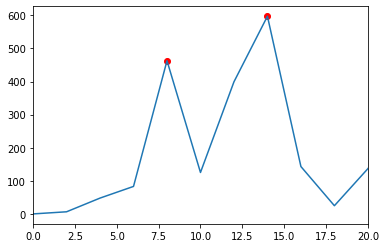

In [46]:
xmaxx = np.array(x)[np.array(findmaxima(Pxx)[:,0], dtype = int)]
maxx = np.array(findmaxima(Pxx)[:,1])
plt.plot(xmaxx, maxx, 'ro')
plt.plot(x,Pxx)
plt.xlim(0,20)

In [45]:
np.array(findmaxima(Pxx)[:,1]);

(0.0, 20.0)

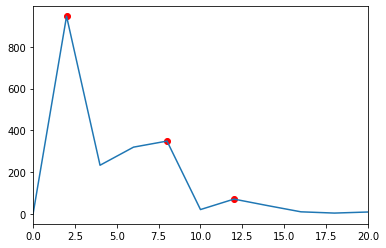

In [30]:
xmaxx = np.array(x)[np.array(findmaxima(Pxx)[:,0], dtype = int)]
maxx = np.array(findmaxima(Pxx)[:,1])
plt.plot(xmaxx, maxx, 'ro')
plt.plot(x,Pxx)
plt.xlim(0,20)

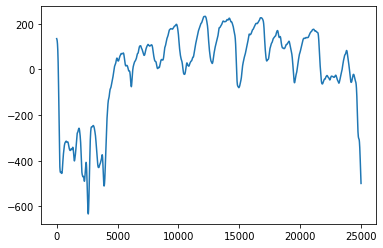

In [35]:
el =18
l = 8
plt.plot(lfp[el,indexes[l] :indexes[l]  +  int(25000)])

In [ ]:
# fare erps